<a href="https://colab.research.google.com/github/Auspiland/my_history/blob/AI_physics/%EC%9D%B8%EC%A7%80%EB%AC%BC_%EA%B3%BC%EB%8F%84%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지를 로드합니다. 적절한 이미지 경로를 사용하세요.
image_path = 'art_14930183851171.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# 이미지를 이진화합니다.
_, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

# 컨투어를 찾습니다.
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 원본 이미지에 컨투어를 그립니다.
contour_image = cv2.drawContours(image.copy(), contours, -1, (0, 255, 0), 2)

plt.figure(figsize=(20, 10))

# 결과를 표시합니다.
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(contour_image, cmap='gray'), plt.title('Image with Contours')
plt.show()


AttributeError: ignored

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_star_tracks(image_path):
    # 이미지를 로드합니다.
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # 이미지를 이진화합니다.
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

    # 컨투어를 찾습니다.
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # 별들의 중심을 저장할 리스트를 초기화합니다.
    star_centers = []

    # 컨투어에서 별의 중심을 추출합니다.
    for contour in contours:
        M = cv2.moments(contour)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            star_centers.append((cX, cY))

    # 별들의 중심을 2차원 배열로 변환합니다.
    star_centers_2d = np.array(star_centers).reshape(-1, 2)

    # PCA를 사용하여 principal axis를 찾습니다.
    _, vt = cv2.PCACompute(star_centers_2d.astype(np.float32), mean=None)

    # principal axis의 방향 벡터를 추출합니다.
    principal_axis = vt[0]

    # 수평 방향 벡터를 정의합니다.
    horizontal_vector = np.array([1, 0])

    # principal axis와 수평 방향 벡터를 사용하여 수직 방향 벡터를 계산합니다.
    vertical_vector = np.array([-principal_axis[1], principal_axis[0]])

    # 결과를 표시합니다.
    plt.figure(figsize=(8, 8))
    plt.imshow(image, cmap='gray')

    # 별의 위치를 표시합니다.
    plt.scatter(star_centers_2d[:, 0], star_centers_2d[:, 1], c='red', marker='.')

    # principal axis를 그립니다.
    plt.quiver(star_centers_2d[:, 0], star_centers_2d[:, 1], principal_axis[0], principal_axis[1], scale=0.5, color='blue', width=0.005)

    # 수직 방향 벡터를 그립니다.
    plt.quiver(star_centers_2d[:, 0], star_centers_2d[:, 1], vertical_vector[0], vertical_vector[1], scale=0.5, color='green', width=0.005)

    plt.title('Star Tracks and Principal Axis')
    plt.show()

# 이미지 파일 경로를 지정하여 함수를 호출합니다.
find_star_tracks('art_14930183851171.jpg')


error: ignored

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_star_tracks(image_path):
    # 이미지를 로드합니다.
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # 이미지를 이진화합니다.
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

    # 컨투어를 찾습니다.
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # 별들의 중심을 저장할 리스트를 초기화합니다.
    star_centers = []

    # 컨투어에서 별의 중심을 추출합니다.
    for contour in contours:
        M = cv2.moments(contour)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            star_centers.append((cX, cY))

    # 별들의 중심을 2차원 배열로 변환합니다.
    star_centers_2d = np.array(star_centers).reshape(-1, 2)

    # PCA를 사용하여 principal axis를 찾습니다.
    _, vt = cv2.PCACompute(star_centers_2d.astype(np.float32), mean=None)

    # principal axis 중에서 궤적과 가장 관련이 높은 두 개의 주성분을 선택합니다.
    principal_axes = vt[:2, :]

    # principal axes의 중심을 찾습니다.
    center_x = np.mean(star_centers_2d[:, 0])
    center_y = np.mean(star_centers_2d[:, 1])
    principal_axes_center = (center_x, center_y)

    # 결과를 표시합니다.
    plt.figure(figsize=(8, 8))
    plt.imshow(image, cmap='gray')

    # 별의 위치를 표시합니다.
    plt.scatter(star_centers_2d[:, 0], star_centers_2d[:, 1], c='red', marker='.')

    # principal axes를 그립니다.
    for axis in principal_axes:
        axis_line = (principal_axes_center[0] + 100 * axis[0], principal_axes_center[1] + 100 * axis[1])
        plt.plot([principal_axes_center[0], axis_line[0]], [principal_axes_center[1], axis_line[1]], color='blue', linewidth=2)

    plt.title('Star Tracks and Principal Axes')
    plt.show()

# 이미지 파일 경로를 지정하여 함수를 호출합니다.
find_star_tracks('startrails_bury_big.jpg')


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_star_tracks(image_path):
    # 이미지를 로드합니다.
    image = cv2.imread(image_path)

    if image is None:
        print("이미지를 로드할 수 없습니다.")
        return

    # 이미지를 흑백으로 변환합니다.
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 가우시안 블러를 적용하여 노이즈를 감소시킵니다.
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Canny 에지 검출을 수행합니다.
    edges = cv2.Canny(blurred, 50, 150)

    # Hough 변환을 사용하여 궤적을 찾습니다.
    lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold=100)

    # 궤적에 대한 컨투어를 찾습니다.
    contours = []
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        contours.append(np.array([[x1, y1], [x2, y2]]))

    # 컨투어를 그리기 위한 빈 이미지를 생성합니다.
    contour_image = np.zeros_like(image)

    # 찾은 궤적에 대한 컨투어를 그립니다.
    cv2.drawContours(contour_image, contours, -1, (255, 255, 255), thickness=2)

    # 결과를 표시합니다.
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(edges, cmap='gray')
    plt.title('Canny Edges')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
    plt.title('Detected Tracks')

    plt.show()

# 이미지 파일 경로를 지정하여 함수를 호출합니다.
find_star_tracks('art_14930183851171.jpg')


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_star_tracks(image_path):
    # 이미지를 로드합니다.
    image = cv2.imread(image_path)

    if image is None:
        print("이미지를 로드할 수 없습니다.")
        return

    # 이미지를 흑백으로 변환합니다.
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 가우시안 블러를 적용하여 노이즈를 감소시킵니다.
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Canny 에지 검출을 수행합니다.
    edges = cv2.Canny(blurred, 50, 150)

    # Hough 변환을 사용하여 궤적을 찾습니다.
    lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold=100)

    # 결과가 None이면 예외 처리
    if lines is None:
        print("궤적을 찾을 수 없습니다.")
        return

    # 궤적에 대한 컨투어를 찾습니다.
    contours = []
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        contours.append(np.array([[x1, y1], [x2, y2]]))

    # 컨투어를 그리기 위한 빈 이미지를 생성합니다.
    contour_image = np.zeros_like(image)

    # 찾은 궤적에 대한 컨투어를 그립니다.
    cv2.drawContours(contour_image, contours, -1, (255, 255, 255), thickness=2)

    # 궤적의 대표직선을 찾습니다.
    # 여기에서는 간단하게 첫 번째 선을 대표직선으로 사용합니다.
    rho, theta = lines[0][0]
    a = np.cos(theta)
    b = np.sin(theta)

    # 대표직선의 방향 벡터
    direction_vector = np.array([b, -a])

    # 궤적 중심점
    track_center = np.array([x0, y0])

    # 수직인 방향 벡터
    perpendicular_vector = np.array([-direction_vector[1], direction_vector[0]])

    # 수직인 방향 벡터를 그리기 위한 끝점
    end_point = track_center + 100 * perpendicular_vector

    # 궤적과 수직인 방향 벡터를 그립니다.
    cv2.line(contour_image, (int(track_center[0]), int(track_center[1])),
             (int(end_point[0]), int(end_point[1])), (0, 255, 0), 2)

    # 결과를 표시합니다.
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(edges, cmap='gray')
    plt.title('Canny Edges')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
    plt.title('Detected Tracks')

    plt.show()

# 이미지 파일 경로를 지정하여 함수를 호출합니다.
find_star_tracks('art_14930183851171.jpg')


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_star_tracks(image_path):
    # 이미지를 로드합니다.
    image = cv2.imread(image_path)

    if image is None:
        print("이미지를 로드할 수 없습니다.")
        return

    # 이미지를 흑백으로 변환합니다.
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 가우시안 블러를 적용하여 노이즈를 감소시킵니다.
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Canny 에지 검출을 수행합니다.
    edges = cv2.Canny(blurred, 50, 150)

    # Hough 변환을 사용하여 궤적을 찾습니다.
    lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold=100)

    # 결과가 None이면 예외 처리
    if lines is None:
        print("궤적을 찾을 수 없습니다.")
        return

    # 궤적에 대한 컨투어를 찾습니다.
    contours = []
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        contours.append(np.array([[x1, y1], [x2, y2]]))

    # 컨투어를 그리기 위한 빈 이미지를 생성합니다.
    contour_image = np.zeros_like(image)

    # 찾은 궤적에 대한 컨투어를 그립니다.
    cv2.drawContours(contour_image, contours, -1, (255, 255, 255), thickness=2)

    # 궤적의 대표직선을 찾습니다.
    # 여기에서는 간단하게 첫 번째 선을 대표직선으로 사용합니다.
    rho, theta = lines[0][0]
    a = np.cos(theta)
    b = np.sin(theta)

    # 대표직선의 방향 벡터
    direction_vector = np.array([a, b])

    # 궤적 중심점
    track_center = np.array([x0, y0])

    # 수평인 방향 벡터
    horizontal_vector = np.array([-b, a])

    # 수직인 방향 벡터
    vertical_vector = np.array([b, -a])

    # 수평인 방향 벡터를 그리기 위한 끝점
    horizontal_end_point = track_center + 100 * horizontal_vector

    # 수직인 방향 벡터를 그리기 위한 끝점
    vertical_end_point = track_center + 100 * vertical_vector

    # 궤적과 수평인 방향 벡터를 그립니다.
    cv2.line(contour_image, (int(track_center[0]), int(track_center[1])),
             (int(horizontal_end_point[0]), int(horizontal_end_point[1])), (0, 0, 255), 2)

    # 궤적과 수직인 방향 벡터를 그립니다.
    cv2.line(contour_image, (int(track_center[0]), int(track_center[1])),
             (int(vertical_end_point[0]), int(vertical_end_point[1])), (0, 255, 0), 2)

    # 결과를 표시합니다.
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(edges, cmap='gray')
    plt.title('Canny Edges')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
    plt.title('Detected Tracks')

    plt.show()

# 이미지 파일 경로를 지정하여 함수를 호출합니다.
find_star_tracks('art_14930183851171.jpg')


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_star_tracks(image_path):
    # 이미지를 로드합니다.
    image = cv2.imread(image_path)

    if image is None:
        print("이미지를 로드할 수 없습니다.")
        return

    # 이미지를 흑백으로 변환합니다.
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 가우시안 블러를 적용하여 노이즈를 감소시킵니다.
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Canny 에지 검출을 수행합니다.
    edges = cv2.Canny(blurred, 50, 150)

    # Hough 변환을 사용하여 궤적을 찾습니다.
    lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold=100)

    # 결과가 None이면 예외 처리
    if lines is None:
        print("궤적을 찾을 수 없습니다.")
        return

    # 궤적의 대표직선을 찾습니다.
    # 여기에서는 간단하게 첫 번째 선을 대표직선으로 사용합니다.
    rho, theta = lines[0][0]
    a = np.cos(theta)
    b = np.sin(theta)

    # 대표직선의 방향 벡터
    direction_vector = np.array([a, b])

    # 궤적 중심점
    track_center = np.array([a * rho, b * rho])

    # 수평인 방향 벡터
    horizontal_vector = np.array([-b, a])

    # 수직인 방향 벡터
    vertical_vector = np.array([b, -a])

    # 수평인 방향 벡터를 그리기 위한 끝점
    horizontal_end_point = track_center + 100 * horizontal_vector

    # 수직인 방향 벡터를 그리기 위한 끝점
    vertical_end_point = track_center + 100 * vertical_vector

    # 궤적과 수평인 방향 벡터를 그립니다.
    cv2.line(image, (int(track_center[0]), int(track_center[1])),
             (int(horizontal_end_point[0]), int(horizontal_end_point[1])), (0, 0, 255), 2)

    # 궤적과 수직인 방향 벡터를 그립니다.
    cv2.line(image, (int(track_center[1]), int(track_center[0])),
             (int(-vertical_end_point[0]), int(-vertical_end_point[1])), (0, 255, 0), 2)

    # 결과를 표시합니다.
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(edges, cmap='gray')
    plt.title('Canny Edges')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Detected Tracks')

    plt.show()

# 이미지 파일 경로를 지정하여 함수를 호출합니다.
find_star_tracks('art_14930183851171.jpg')


위의 그림은 PCA가 아닌 Hough 기법을 이용한 것. PCA를 이용한다면 어떻게 될까? 그 결과는 아래와 같음.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_star_tracks(image_path):
    # 이미지를 로드합니다.
    image = cv2.imread(image_path)

    if image is None:
        print("이미지를 로드할 수 없습니다.")
        return

    # 이미지를 흑백으로 변환합니다.
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 가우시안 블러를 적용하여 노이즈를 감소시킵니다.
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Canny 에지 검출을 수행합니다.
    edges = cv2.Canny(blurred, 50, 150)

    # 주성분 분석을 사용하여 궤적을 찾습니다.
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # 주성분 분석을 위한 점들을 수집합니다.
    points = np.vstack([contour.squeeze() for contour in contours])

    # 데이터를 정규화합니다.
    mean = np.mean(points, axis=0)
    normalized_points = points - mean

    # 주성분 분석을 수행합니다.
    _, eigenvectors = cv2.PCACompute(normalized_points, mean=None)

    # 주성분 벡터
    principal_vector = eigenvectors[:, 0]

    # 궤적 중심점
    track_center = mean.squeeze()

    # 궤적의 방향과 수평한 주성분 벡터의 방향을 조절합니다.
    if np.dot(principal_vector, [0, 1]) < 0:
        principal_vector = -principal_vector

    # 수평인 방향 벡터
    horizontal_vector = principal_vector

    # 수직인 방향 벡터
    vertical_vector = np.array([-horizontal_vector[1], horizontal_vector[0]])

    # 수평인 방향 벡터를 그리기 위한 끝점
    horizontal_end_point = track_center + 100 * horizontal_vector

    # 수직인 방향 벡터를 그리기 위한 끝점
    vertical_end_point = track_center + 100 * vertical_vector

    # 결과를 표시합니다.
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(edges, cmap='gray')
    plt.title('Canny Edges')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Detected Tracks')

    # 궤적과 수평인 방향 벡터를 그립니다.
    plt.plot([track_center[0], horizontal_end_point[0]], [track_center[1], horizontal_end_point[1]], color='red', linewidth=2)

    # 궤적과 수직인 방향 벡터를 그립니다.
    plt.plot([track_center[0], vertical_end_point[0]], [track_center[1], vertical_end_point[1]], color='green', linewidth=2)

    plt.show()

# 이미지 파일 경로를 지정하여 함수를 호출합니다.
find_star_tracks('art_14930183851171.jpg')


축을 이상하게 찾는 문제가 발생함. 그렇다면 머신러닝을 활용해 축을 찾아가는 코드를 찾을 수 있는가?

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_star_tracks(image_path):
    # 이미지를 로드합니다.
    image = cv2.imread(image_path)

    if image is None:
        print("이미지를 로드할 수 없습니다.")
        return

    # 이미지를 흑백으로 변환합니다.
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 가우시안 블러를 적용하여 노이즈를 감소시킵니다.
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Canny 에지 검출을 수행합니다.
    edges = cv2.Canny(blurred, 50, 150)

    # 주성분 분석을 사용하여 궤적을 찾습니다.
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # 주성분 분석을 위한 점들을 수집합니다.
    points = np.vstack([contour.squeeze() for contour in contours])

    # 데이터를 정규화합니다.
    mean = np.mean(points, axis=0)
    normalized_points = points - mean

    # 주성분 분석을 수행합니다.
    _, eigenvectors = cv2.PCACompute(normalized_points, mean=None)

    # 주성분 벡터
    principal_vector = eigenvectors[:, 0]

    # 궤적 중심점
    track_center = mean.squeeze()

    # Reference direction
    reference_direction = np.array([0, 1])

    # Align vectors with the reference direction
    if np.dot(principal_vector, reference_direction) < 0:
        principal_vector = -principal_vector

    # 수평인 방향 벡터
    horizontal_vector = principal_vector

    # 수직인 방향 벡터
    vertical_vector = np.array([-horizontal_vector[1], horizontal_vector[0]])

    # 수평인 방향 벡터를 그리기 위한 끝점
    horizontal_end_point = track_center + 100 * horizontal_vector

    # 수직인 방향 벡터를 그리기 위한 끝점
    vertical_end_point = track_center + 100 * vertical_vector

    # 결과를 표시합니다.
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(edges, cmap='gray')
    plt.title('Canny Edges')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Detected Tracks')

    # 궤적과 수평인 방향 벡터를 그립니다.
    cv2.line(image, (int(track_center[0]), int(track_center[1])),
             (int(horizontal_end_point[0]), int(horizontal_end_point[1])), (0, 0, 255), 2)

    # 궤적과 수직인 방향 벡터를 그립니다.
    cv2.line(image, (int(track_center[0]), int(track_center[1])),
             (int(vertical_end_point[0]), int(vertical_end_point[1])), (0, 255, 0), 2)

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

# 이미지 파일 경로를 지정하여 함수를 호출합니다.
find_star_tracks('startrails_bury_big.jpg')


# Real project

In [ ]:
import pandas as pd
from google.colab import files
import io
import numpy as np
import math
import matplotlib.pyplot as plt

# 파일 경로를 직접 입력
file_path = "/content/He.xlsx"  # 파일 경로를 실제 파일 경로로 변경해야 합니다.

# 엑셀 파일을 Pandas 데이터프레임으로 읽어오기
df = pd.read_excel(file_path)

# B3부터 B1817까지의 데이터를 'angle' 변수에 저장
angle = df.iloc[200:1985, 1]
# D3부터 D1817까지의 데이터를 'Intensity' 변수에 저장
Intensity = df.iloc[200:1985, 3]

fs = 100000     # 1초간 수집하는 평균 샘플 수
dt = 1/fs

nfft = len(angle)

df = fs / nfft
k = np.arange(nfft)
f = k*df

nfft_half = math.trunc(nfft/2)
f0 = f[range(nfft_half)]

fft_y = np.fft.fft(Intensity)/nfft*2
fft_y0 = fft_y[range(nfft_half)]

amp = abs(fft_y0)


# 그래프로 표시
plt.plot(f0,amp)

idxy = np.argsort(-amp)
for i in range(10):
    print('freq = ', f0[idxy[i]], 'amp=',fft_y[idxy[i]])


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 파일 경로를 직접 입력
file_path = "/content/He.xlsx"  # 파일 경로를 실제 파일 경로로 변경해야 합니다.

# 엑셀 파일을 Pandas 데이터프레임으로 읽어오기
df = pd.read_excel(file_path)

# B3부터 B1817까지의 데이터를 'angle' 변수에 저장
angle = df.iloc[164:1818, 1]

# D3부터 D1817까지의 데이터를 'Intensity' 변수에 저장
Intensity = df.iloc[164:1818, 3]

# Intensity의 극댓값 찾기
peaks, _ = find_peaks(Intensity)

# Intensity 값을 0으로 만들고 극댓값만 남기기
Intensity_processed = np.zeros_like(Intensity)
Intensity_processed[peaks] = Intensity.iloc[peaks]

# 결과 확인을 위한 그래프 그리기
plt.scatter(angle, Intensity_processed)
plt.xlabel('Angle')
plt.ylabel('Intensity')
plt.title('Processed Intensity')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM

# 파일 경로를 직접 입력
file_path = "/content/He.xlsx"  # 파일 경로를 실제 파일 경로로 변경해야 합니다.

# 엑셀 파일을 Pandas 데이터프레임으로 읽어오기
df = pd.read_excel(file_path)

# B3부터 B1817까지의 데이터를 'angle' 변수에 저장
angle = df.iloc[164:1818, 1]

# D3부터 D1817까지의 데이터를 'Intensity' 변수에 저장
Intensity = df.iloc[164:1818, 3]

# 특성으로 사용할 데이터 생성 (여기서는 Intensity만 사용)
X = Intensity.values.reshape(-1, 1)

# One-Class SVM 모델 초기화
model = OneClassSVM(nu=0.05, kernel='rbf', gamma=0.1)

# 모델 학습
model.fit(X)

# 감지 결과 얻기 (1: peak, -1: peak이 아님)
predictions = model.predict(X)

# peak에 해당하는 부분 선택
peaks = X[predictions == 1]

# 결과 확인을 위한 그래프 그리기
plt.plot(angle, Intensity, label='Original Data')
plt.plot(angle[predictions == 1], peaks, 'ro', label='Detected Peaks')
plt.xlabel('Angle')
plt.ylabel('Intensity')
plt.title('Peak Detection using One-Class SVM')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.signal import savgol_filter

# 파일 경로를 직접 입력
file_path = "/content/He.xlsx"  # 파일 경로를 실제 파일 경로로 변경해야 합니다.

# 엑셀 파일을 Pandas 데이터프레임으로 읽어오기
df = pd.read_excel(file_path)

# B3부터 B1817까지의 데이터를 'angle' 변수에 저장
angle = df.iloc[164:1818, 1]

# D3부터 D1817까지의 데이터를 'Intensity' 변수에 저장
Intensity = df.iloc[164:1818, 3]

# Intensity를 Savitzky-Golay 필터로 부드럽게 만듦
smoothed_intensity = savgol_filter(Intensity.values, window_length=15, polyorder=2)

# 부드럽게 만든 데이터에서 peak을 찾음
peaks, _ = find_peaks(smoothed_intensity)

# 결과 확인을 위한 그래프 그리기
plt.plot(angle, Intensity, label='Original Data')
plt.plot(angle, smoothed_intensity, label='Smoothed Data')
plt.plot(angle.iloc[peaks], smoothed_intensity[peaks], 'ro', label='Detected Peaks')
plt.xlabel('Angle')
plt.ylabel('Intensity')
plt.title('Peak Detection using Smoothed Data')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks_cwt
from scipy.signal import savgol_filter

# 파일 경로를 직접 입력
file_path = "/content/He.xlsx"  # 파일 경로를 실제 파일 경로로 변경해야 합니다.

# 엑셀 파일을 Pandas 데이터프레임으로 읽어오기
df = pd.read_excel(file_path)

# B3부터 B1817까지의 데이터를 'angle' 변수에 저장
angle = df.iloc[164:1818, 1]

# D3부터 D1817까지의 데이터를 'Intensity' 변수에 저장
Intensity = df.iloc[164:1818, 3]

# Intensity를 Savitzky-Golay 필터로 부드럽게 만듦
smoothed_intensity = savgol_filter(Intensity.values, window_length=15, polyorder=2)

# 특징 추출을 사용하여 peak을 찾음
widths = np.arange(1, 31)
peaks = find_peaks_cwt(smoothed_intensity, widths)

# peaks에 포함된 값이 실제로 인덱스에 있는지 확인
valid_peaks = [p for p in peaks if p in range(len(angle))]

# 결과 확인을 위한 그래프 그리기
plt.plot(angle, Intensity, label='Original Data')
plt.plot(angle, smoothed_intensity, label='Smoothed Data')
plt.plot(angle.iloc[valid_peaks], smoothed_intensity[valid_peaks], 'ro', label='Detected Peaks')
plt.xlabel('Angle')
plt.ylabel('Intensity')
plt.title('Peak Detection using Feature Extraction')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks_cwt
from scipy.signal import savgol_filter

# 파일 경로를 직접 입력
file_path = "/content/He.xlsx"  # 파일 경로를 실제 파일 경로로 변경해야 합니다.

# 엑셀 파일을 Pandas 데이터프레임으로 읽어오기
df = pd.read_excel(file_path)

# B3부터 B1817까지의 데이터를 'angle' 변수에 저장
angle = df.iloc[164:1818, 1]

# D3부터 D1817까지의 데이터를 'Intensity' 변수에 저장
Intensity = df.iloc[164:1818, 3]

# Intensity를 Savitzky-Golay 필터로 부드럽게 만듦
smoothed_intensity = savgol_filter(Intensity.values, window_length=15, polyorder=2)

# 특징 추출을 사용하여 peak을 찾음
widths = np.arange(1, 31)
peaks = find_peaks_cwt(smoothed_intensity, widths)

# peaks에 포함된 값이 실제로 인덱스에 있는지 확인
valid_peaks = [p for p in peaks if p in range(len(angle))]

# 결과 확인을 위한 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(angle, Intensity, label='Original Data', linewidth=1, linestyle='-', color='blue')
plt.plot(angle, smoothed_intensity, label='Smoothed Data', linewidth=2, linestyle='--', color='green')
plt.plot(angle.iloc[valid_peaks], smoothed_intensity[valid_peaks], 'ro', label='Detected Peaks')

plt.xlabel('Angle')
plt.ylabel('Intensity')
plt.title('Peak Detection using Feature Extraction')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks_cwt
from scipy.signal import savgol_filter

# 파일 경로를 직접 입력
file_path = "/content/He.xlsx"  # 파일 경로를 실제 파일 경로로 변경해야 합니다.

# 엑셀 파일을 Pandas 데이터프레임으로 읽어오기
df = pd.read_excel(file_path)

# B3부터 B1817까지의 데이터를 'angle' 변수에 저장
angle = df.iloc[164:1818, 1]

# D3부터 D1817까지의 데이터를 'Intensity' 변수에 저장
Intensity = df.iloc[164:1818, 3]

# Intensity를 Savitzky-Golay 필터로 부드럽게 만듦
smoothed_intensity = savgol_filter(Intensity.values, window_length=15, polyorder=2)

# 특징 추출을 사용하여 peak을 찾음
widths = np.arange(1, 31)
peaks = find_peaks_cwt(smoothed_intensity, widths)

# peaks에 포함된 값이 실제로 인덱스에 있는지 확인
valid_peaks = [p for p in peaks if p in range(len(angle))]

# 주변 기울기 비교를 위한 윈도우 크기
window_size = 5

# 추가적인 필터링을 수행할 peak 리스트
final_peaks = []

# 주변 기울기 비교
for peak in valid_peaks:
    start_index = max(0, peak - window_size)
    end_index = min(len(angle), peak + window_size + 1)

    # 주변 기울기 계산
    local_gradients = np.gradient(smoothed_intensity[start_index:end_index])

    # 평균 기울기 계산
    average_gradient = np.mean(local_gradients)

    # 주변 기울기가 일정 임계값 이상이면 peak로 판단
    if np.abs(average_gradient) > 0.002:  # 임계값을 조절하세요
        final_peaks.append(peak)

# 결과 확인을 위한 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(angle, Intensity, label='Original Data', linewidth=1, linestyle='-', color='blue')
plt.plot(angle, smoothed_intensity, label='Smoothed Data', linewidth=2, linestyle='--', color='green')
plt.plot(angle.iloc[final_peaks], smoothed_intensity[final_peaks], 'ro', label='Final Peaks')

plt.xlabel('Angle')
plt.ylabel('Intensity')
plt.title('Peak Detection with Additional Filtering')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks_cwt
from scipy.signal import savgol_filter
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 파일 경로를 직접 입력
file_path = "/content/He.xlsx"  # 파일 경로를 실제 파일 경로로 변경해야 합니다.

# 엑셀 파일을 Pandas 데이터프레임으로 읽어오기
df = pd.read_excel(file_path)

# B3부터 B1817까지의 데이터를 'angle' 변수에 저장
angle = df.iloc[164:1818, 1]

# D3부터 D1817까지의 데이터를 'Intensity' 변수에 저장
Intensity = df.iloc[164:1818, 3]

# Intensity를 Savitzky-Golay 필터로 부드럽게 만듦
smoothed_intensity = savgol_filter(Intensity.values, window_length=15, polyorder=2)

# 특징 추출을 사용하여 peak을 찾음
widths = np.arange(1, 31)
peaks = find_peaks_cwt(smoothed_intensity, widths)

# peaks에 포함된 값이 실제로 인덱스에 있는지 확인
valid_peaks = [p for p in peaks if p in range(len(angle))]

# 주변 기울기 비교를 위한 윈도우 크기
window_size = 5

# 추가적인 필터링을 수행할 peak 리스트
final_peaks = []

# 주변 기울기 비교
for peak in valid_peaks:
    start_index = max(0, peak - window_size)
    end_index = min(len(angle) - 1, peak + window_size + 1)

    # 주변 기울기 계산
    local_gradients = np.gradient(smoothed_intensity[start_index:end_index])

    # 평균 기울기 계산
    average_gradient = np.mean(local_gradients)

    # 주변 기울기를 특성으로 사용하여 머신러닝 모델 학습
    X_train = np.array([average_gradient] * len(valid_peaks)).reshape(-1, 1)
    y_train = [1 if p == peak else 0 for p in valid_peaks]

    # RandomForestClassifier 사용 (다른 모델을 선택할 수도 있음)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # 주변 기울기를 사용하여 예측
    X_predict = np.array([average_gradient]).reshape(-1, 1)
    prediction = model.predict(X_predict)

    # 예측이 1인 경우에만 최종 peaks에 추가
    if prediction == 1:
        final_peaks.append(peak)

# 결과 확인을 위한 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(angle, Intensity, label='Original Data', linewidth=1, linestyle='-', color='blue')
plt.plot(angle, smoothed_intensity, label='Smoothed Data', linewidth=2, linestyle='--', color='green')
plt.plot(angle.iloc[final_peaks], smoothed_intensity[final_peaks], 'ro', label='Final Peaks')

plt.xlabel('Angle')
plt.ylabel('Intensity')
plt.title('Peak Detection with Machine Learning')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

In [ ]:
import pandas as pd
from google.colab import files
import io
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks


# 파일 경로를 직접 입력
file_path = "/content/H.xlsx"  # 파일 경로를 실제 파일 경로로 변경해야 합니다.

# 엑셀 파일을 Pandas 데이터프레임으로 읽어오기
df = pd.read_excel(file_path)

# B3부터 B1817까지의 데이터를 'angle' 변수에 저장
angle = df.iloc[350:1815, 1]-0.871

# D3부터 D1817까지의 데이터를 'Intensity' 변수에 저장
intensity = df.iloc[350:1815, 3]
y=intensity.values
x=angle.values

n_max=y[0]
n_min=y[0]
max_key = x[0]
min_key = x[0]
stack=0
peaks={}

for k, n in zip(x,y):
  if n > n_max:
    n_max = n
    max_key = k
    stack=0
  elif n < n_min:
    n_min=n
    min_key = k
    stack=0
  else:
    stack+=1
    if max_key>min_key:
      if stack>5 and k-max_key>0.3 and n_max-n_min>0.02 and n_max-n>0.02:
        print("n: {}, n_max: {}, max_key: {}, n_min: {}, min_key: {}".format(n,n_max,max_key,n_min,min_key))
        peaks[min_key]=n_min
        n_min = n_max
        min_key=max_key
    elif max_key<min_key:
      if stack>5 and k-min_key>0.3 and n_max-n_min>0.02 and n-n_min>0.02:
        print("n: {}, n_max: {}, max_key: {}, n_min: {}, min_key: {}".format(n,n_max,max_key,n_min,min_key))
        peaks[max_key]=n_max
        n_max = n_min
        max_key=min_key
    else:
      pass
peaks[max_key]=n_max
peaks[min_key]=n_min

print(peaks)


plt.figure(figsize=(12, 6))
plt.plot(angle,intensity)
plt.plot(peaks.keys(),peaks.values(), 'go',markersize=5)


In [ ]:
import pandas as pd
from google.colab import files
import io
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks


# 파일 경로를 직접 입력
file_path = "/content/He.xlsx"  # 파일 경로를 실제 파일 경로로 변경해야 합니다.

# 엑셀 파일을 Pandas 데이터프레임으로 읽어오기
df = pd.read_excel(file_path)

# B3부터 B1817까지의 데이터를 'angle' 변수에 저장
angle = df.iloc[200:1985, 1]-1.167

# D3부터 D1817까지의 데이터를 'Intensity' 변수에 저장
intensity = df.iloc[200:1985, 3]
y=intensity.values
x=angle.values

n_max=y[0]
n_min=y[0]
max_key = x[0]
min_key = x[0]
stack=0
peaks={}

for k, n in zip(x,y):
  if n > n_max:
    n_max = n
    max_key = k
    stack=0
  elif n < n_min:
    n_min=n
    min_key = k
    stack=0
  else:
    stack+=1
    if max_key>min_key:
      if stack>5 and k-max_key>0.3 and n_max-n_min>0.02 and n_max-n>0.02:
        print("n: {}, n_max: {}, max_key: {}, n_min: {}, min_key: {}".format(n,n_max,max_key,n_min,min_key))
        peaks[min_key]=n_min
        n_min = n_max
        min_key=max_key
    elif max_key<min_key:
      if stack>5 and k-min_key>0.3 and n_max-n_min>0.02 and n-n_min>0.02:
        print("n: {}, n_max: {}, max_key: {}, n_min: {}, min_key: {}".format(n,n_max,max_key,n_min,min_key))
        peaks[max_key]=n_max
        n_max = n_min
        max_key=min_key
    else:
      pass
peaks[max_key]=n_max
peaks[min_key]=n_min

print(peaks)


plt.figure(figsize=(12, 6))
plt.plot(angle,intensity)
plt.plot(peaks.keys(),peaks.values(), 'go',markersize=5)

## 데이터 생성

In [ ]:
import pandas as pd
from google.colab import files
import io
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks


# 파일 경로를 직접 입력
file_path = "/content/H.xlsx"  # 파일 경로를 실제 파일 경로로 변경해야 합니다.

# 엑셀 파일을 Pandas 데이터프레임으로 읽어오기
df = pd.read_excel(file_path)

# B3부터 B1817까지의 데이터를 'angle' 변수에 저장
angle = df.iloc[350:1815, 1]-0.871

# D3부터 D1817까지의 데이터를 'Intensity' 변수에 저장
intensity = df.iloc[350:1815, 3]
y=intensity.values
x=angle.values

plt.plot(angle,intensity)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

##################### 준비 단계 ###########################
def generate_noise(mu,sig):
    noise = np.random.normal(mu, sig, 1)[0]
    return noise


def plot(x_value, y_value, x2_value, y2_value):
    plt.figure()
    plt.plot(x_value, y_value, color = 'r')   # 추정 함수
    plt.scatter(x2_value, y2_value)           # 가상 데이터
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.show()

############################ 함수 생성 ###########################
# 가우시안 혼합 모델을 이용할 것.
# 입력 받은 데이터를 가장 잘 설명할 수 있는 GMM 추정 후 2500 샘플 추출
def func(input_data):
    gmm = GaussianMixture(n_components=2, covariance_type="full",tol=0.001)
    gmm = gmm.fit(X=np.expand_dims(input_data,1))
    gmm_x = np.linspace(-2,4,2500)
    gmm_y = np.exp(gmm.score_samples(gmm_x.reshape(-1,1)))
    return gmm_x, gmm_y

########################### 데이터 생성 ###########################
data = pd.DataFrame({'xx':np.arange(0,15,0.05)}) # 0~15 사이 0.05 간격 변수 생성
data['yy'] = data['xx'].map(lambda x: func(x))
# data['yy'] = data['xx'].map(lambda x: func(x))

"""
1 원래 데이터 생성
2 노이즈 추출할 정규 분포의 표준편차 정의
3 노이즈 생성
4 원래 데이터와 노이즈 합치기
"""

"""
data_with_noise = pd.DataFrame({'xx': np.arange(0.25,15,0.15)})
data_with_noise['yy'] = data_with_noise['xx'].map(lambda: func(x))
mu = 0      # noise를 추출할 정규 분포의 평균
data_with_noise['sigma'] = data_with_noise['yy'].abs() * 0.2
# 각 데이터마다 사로 다른 값이 적용되도록 y값의 0.2배로 표준편차를 설정
data_with_noise['noise'] = data_with_noise.apply(lambda x: generate_noise(mu, x['sigma']),axis=1)
data_with_noise['result'] = data_with_noise['yy'] + data_with_noise['noise']
"""

term = np.random.normal(0,0.4,200)
term = np.append(term, np.random.normal(1.5,0.5,200))
xx_2, yy_2 = func(term)
data_2 = pd.DataFrame({'xx': xx_2, 'yy': yy_2})

data_2_with_noise = data_2.sample(frac=0.1, replace=True, random_state=1)
mu = 0
data_2_with_noise['sigma'] = data_2_with_noise['yy'].abs() * 0.2
data_2_with_noise['noise'] = data_2_with_noise.apply(lambda x: generate_noise(mu, x['sigma']),axis=1)
data_2_with_noise['result'] = data_2_with_noise['yy'] + data_2_with_noise['noise']

plot(data_2['xx'].values, data_2['yy'].values, data_2_with_noise['xx'].values,
     data_2_with_noise['result'].values)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 주어진 데이터
data_points = [(15.16, 0.54), (17.14, 0.57), (23.59, 0.67)]

# 데이터 포인트에서 가우시안 함수를 사용한 분포 생성
def gaussian_distribution(x, x_peak, intensity, std_dev):
    return intensity * np.exp(-((x - x_peak)**2) / (2 * std_dev**2))

# 0부터 30까지 2500개로 나눈 데이터 포인트 생성
x_values = np.linspace(0, 30, 2500)

# 전체 분포 초기화
total_distribution = np.zeros_like(x_values)

# 각 데이터 포인트에서의 분포를 더함
for x_peak, intensity in data_points:
    # 표준편차를 더 작게 설정하여 peak를 명확하게 구분
    std_dev = 0.2 if x_peak == 15.16 else 0.2  # 예시로 표준편차를 설정, 조절 가능
    total_distribution += gaussian_distribution(x_values, x_peak, intensity, std_dev)

# 그림 그리기
plt.figure(figsize=(10, 6))
plt.plot(x_values, total_distribution, label='Total Distribution')

# 그래프 및 축 제목 설정
plt.title('Total Distribution with Further Differentiated Peaks')
plt.xlabel('Angle (degrees)')
plt.ylabel('Intensity')

# x축과 y축 범위 설정
plt.xlim(0, 30)

# 그리드 표시
plt.grid(True)

# 범례 추가
plt.legend()

# 그림 보여주기
plt.show()


### 함수를 잘 만들어 보자 np.cumsum부분

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 주어진 데이터
data_points = np.array([[15.16, 0.54], [17.14, 0.57], [23.59, 0.67]])

# 데이터 포인트에서 가우시안 함수를 사용한 분포 생성
def gaussian_distribution(x, x_peak, intensity, std_dev):
    return intensity * np.exp(-((x - x_peak)**2) / (2 * std_dev**2))

# 0부터 30까지 2500개로 나눈 데이터 포인트 생성
x_values = np.linspace(0, 30, 2500)

# 전체 분포 초기화
total_distribution = np.zeros_like(x_values)

# 각 데이터 포인트에서의 분포를 더함
for x_peak, intensity in data_points:
    # 표준편차를 작게 설정하여 peak를 명확하게 구분
    std_dev = 0.25 if x_peak in [15.16, 17.14, 23.59] else 0.2  # 예시로 표준편차를 설정, 조절 가능
    total_distribution += gaussian_distribution(x_values, x_peak, intensity, std_dev)

# 최대 intensity 값 계산
max_intensity = np.max(total_distribution)

# 무작위 연속적인 노이즈 추가 (부드러운 변화를 갖도록 조절)
#np.random.seed(41)  # 노이즈를 일정하게 유지하기 위해 시드 설정

# 노이즈 생성 (고정된 크기)
noise_intensity = 0.02  # 노이즈 크기
noise = noise_intensity * np.cumsum(np.random.randn(len(x_values)))

# 노이즈를 데이터에 추가하되, 최대 intensity 값을 유지하도록 조절
total_distribution_with_noise = total_distribution + noise
total_distribution_with_noise = max_intensity * (total_distribution_with_noise / np.max(total_distribution_with_noise))

# 보정을 통해 음수 값을 0으로 만듦
#total_distribution_with_noise = np.maximum(0, total_distribution_with_noise)

# 그림 그리기
plt.figure(figsize=(10, 6))

for i in (0,1,2):
    plt.axvline(data_points[i][0], color='r')

#plt.plot(x_values, total_distribution_with_noise, label='Total Distribution with Continuous Noise')
#plt.plot(x_values, np.cumsum(np.random.randn(len(x_values))))
plt.plot(x_values, total_distribution_with_noise / np.max(total_distribution_with_noise))

# 그래프 및 축 제목 설정
plt.title('Total Distribution with Continuous Noise (Non-negative Intensity)')
plt.xlabel('Angle (degrees)')
plt.ylabel('Intensity')


# x축과 y축 범위 설정
plt.xlim(0, 30)

# 그리드 표시
plt.grid(True)

# 범례 추가
plt.legend()

# 그림 보여주기
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 주어진 데이터
data_points = np.array([[15.16, 0.54], [17.14, 0.57], [23.59, 0.67]])

# 데이터 포인트에서 가우시안 함수를 사용한 분포 생성
def gaussian_distribution(x, x_peak, intensity, std_dev):
    return intensity * np.exp(-((x - x_peak)**2) / (2 * std_dev**2))

# 0부터 30까지 2500개로 나눈 데이터 포인트 생성
x_values = np.linspace(0, 30, 2500)

# 전체 분포 초기화
total_distribution = np.zeros_like(x_values)

# 각 데이터 포인트에서의 분포를 더함
for x_peak, intensity in data_points:
    # 표준편차를 작게 설정하여 peak를 명확하게 구분
    std_dev = 0.25 if x_peak in [15.16, 17.14, 23.59] else 0.2  # 예시로 표준편차를 설정, 조절 가능
    total_distribution += gaussian_distribution(x_values, x_peak, intensity, std_dev)

# 최대 intensity 값 계산
max_intensity = 23.59

# 무작위 연속적인 노이즈 추가 (부드러운 변화를 갖도록 조절)
noise_intensity = 0.02  # 노이즈 크기
noise = noise_intensity * np.cumsum(np.random.randn(len(x_values)))

# 노이즈를 데이터에 추가하되, 최대 intensity 값을 유지하도록 조절
total_distribution_with_noise = total_distribution + noise
total_distribution_with_noise = max_intensity * (total_distribution_with_noise / np.max(total_distribution_with_noise))

# 이동 평균을 사용하여 노이즈 필터링
window_size = 50
filtered_noise = np.convolve(noise, np.ones(window_size)/window_size, mode='same')

# 노이즈 필터링 적용
total_distribution_with_filtered_noise = total_distribution + filtered_noise
total_distribution_with_filtered_noise = max_intensity * (total_distribution_with_filtered_noise / np.max(total_distribution_with_filtered_noise))

# 그림 그리기
plt.figure(figsize=(10, 6))

for i in (0,1,2):
    plt.axvline(data_points[i][0], color='r')

plt.plot(x_values, total_distribution_with_noise, label='Total Distribution with Noise')

# 그래프 및 축 제목 설정
plt.title('Total Distribution with Noise and Filtered Noise')
plt.xlabel('Angle (degrees)')
plt.ylabel('Intensity')

# x축과 y축 범위 설정
plt.xlim(0, 30)

# 그리드 표시
plt.grid(True)

# 범례 추가
plt.legend()

# 그림 보여주기
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 주어진 데이터
data_points = [(15.16, 0.54), (17.14, 0.57), (23.59, 0.67)]

# 데이터 포인트에서 가우시안 함수를 사용한 분포 생성
def gaussian_distribution(x, x_peak, intensity, std_dev):
    return intensity * np.exp(-((x - x_peak)**2) / (2 * std_dev**2))

# 0부터 30까지 2500개로 나눈 데이터 포인트 생성
x_values = np.linspace(0, 30, 2500)

# 전체 분포 초기화
total_distribution = np.zeros_like(x_values)

# 각 데이터 포인트에서의 분포를 더함
for x_peak, intensity in data_points:
    # 표준편차를 작게 설정하여 peak를 명확하게 구분
    std_dev = 0.2 if x_peak in [15.16, 17.14] else 0.2  # 예시로 표준편차를 설정, 조절 가능
    total_distribution += gaussian_distribution(x_values, x_peak, intensity, std_dev)

# 무작위 연속적인 노이즈 추가 (부드러운 변화를 갖도록 조절)
np.random.seed(42)  # 노이즈를 일정하게 유지하기 위해 시드 설정

# 노이즈 생성
noise_intensity = 0.01
noise = noise_intensity * np.random.randn(len(x_values))

# 노이즈를 데이터에 추가
total_distribution_with_noise = total_distribution + noise

# 보정을 통해 음수 값을 0으로 만듦
total_distribution_with_noise = np.maximum(0, total_distribution_with_noise)

# 그림 그리기
plt.figure(figsize=(10, 6))
plt.plot(x_values, total_distribution_with_noise, label='Total Distribution with Continuous Noise')

# 그래프 및 축 제목 설정
plt.title('Total Distribution with Continuous Noise (Non-negative Intensity)')
plt.xlabel('Angle (degrees)')
plt.ylabel('Intensity')

# x축과 y축 범위 설정
plt.xlim(0, 30)

# 그리드 표시
plt.grid(True)

# 범례 추가
plt.legend()

# 그림 보여주기
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 주어진 데이터
data_points = [(15.16, 0.54), (17.14, 0.57), (23.59, 0.67)]

# 데이터 포인트에서 가우시안 함수를 사용한 분포 생성
def gaussian_distribution(x, x_peak, intensity, std_dev):
    return intensity * np.exp(-((x - x_peak)**2) / (2 * std_dev**2))

# 0부터 30까지 2500개로 나눈 데이터 포인트 생성
x_values = np.linspace(0, 30, 2500)

# 전체 분포 초기화
total_distribution = np.zeros_like(x_values)

# 각 데이터 포인트에서의 분포를 더함
for x_peak, intensity in data_points:
    # 표준편차를 작게 설정하여 peak를 명확하게 구분
    std_dev = 0.5*np.random.randn() if x_peak in [15.16, 17.14] else 0.2  # 예시로 표준편차를 설정, 조절 가능
    total_distribution += gaussian_distribution(x_values, x_peak, intensity, std_dev)

# 최대 intensity 값 계산
max_intensity = np.max(total_distribution)

# 노이즈 생성
noise_intensity = 0.45 * np.exp(-((x_values - 7)**2) / (2 * 0.7**2))

# 노이즈를 데이터에 추가하되, 최대 intensity 값을 유지하도록 조절
total_distribution_with_noise = total_distribution + noise_intensity
total_distribution_with_noise = max_intensity * (total_distribution_with_noise / np.max(total_distribution_with_noise))

# 보정을 통해 음수 값을 0으로 만듦
total_distribution_with_noise = np.maximum(0, total_distribution_with_noise)

# 그림 그리기
plt.figure(figsize=(10, 6))
plt.plot(x_values, total_distribution_with_noise, label='Total Distribution with Continuous Noise')

# 그래프 및 축 제목 설정
plt.title('Total Distribution with Continuous Noise (Non-negative Intensity)')
plt.xlabel('Angle (degrees)')
plt.ylabel('Intensity')

# x축과 y축 범위 설정
plt.xlim(0, 30)

# 그리드 표시
plt.grid(True)

# 범례 추가
plt.legend()

# 그림 보여주기
plt.show()


임의의 진폭과 표준편차를 갖는 가우스 함수를 약 두 개 정도 더하고 노이즈를 섞어보자

## peak 찾기

### 가우시안 스무딩을 이용해 분포를 부드럽게 만들기

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d

# 주어진 데이터
data_points = [(15.16, 0.54), (17.14, 0.57), (23.59, 0.67)]

# 데이터 포인트에서 가우시안 함수를 사용한 분포 생성
def gaussian_distribution(x, x_peak, intensity, std_dev):
    return intensity * np.exp(-((x - x_peak)**2) / (2 * std_dev**2))

# 0부터 30까지 2500개로 나눈 데이터 포인트 생성
x_values = np.linspace(0, 30, 2500)

# 전체 분포 초기화
total_distribution = np.zeros_like(x_values)

# 각 데이터 포인트에서의 분포를 더함
for x_peak, intensity in data_points:
    # 표준편차를 작게 설정하여 peak를 명확하게 구분
    std_dev = 0.25 if x_peak in [15.16, 17.14, 23.59] else 0.2  # 예시로 표준편차를 설정, 조절 가능
    total_distribution += gaussian_distribution(x_values, x_peak, intensity, std_dev)

# 최대 intensity 값 계산
max_intensity = np.max(total_distribution)

# 무작위 연속적인 노이즈 추가
np.random.seed(41)
noise_intensity = 0.02
noise = noise_intensity * np.cumsum(np.random.randn(len(x_values)))

# 노이즈를 데이터에 추가하되, 최대 intensity 값을 유지하도록 조절
total_distribution_with_noise = total_distribution + noise
total_distribution_with_noise = max_intensity * (total_distribution_with_noise / np.max(total_distribution_with_noise))

# 가우시안 필터 적용
smoothed_distribution = gaussian_filter1d(total_distribution_with_noise, sigma=2)

# 그림 그리기
plt.figure(figsize=(10, 6))
plt.plot(x_values, total_distribution_with_noise, label='Total Distribution with Continuous Noise')
plt.plot(x_values, smoothed_distribution, label='Smoothed Distribution')

# 그래프 및 축 제목 설정
plt.title('Total Distribution with Continuous Noise and Smoothed Distribution')
plt.xlabel('Angle (degrees)')
plt.ylabel('Intensity')

# x축과 y축 범위 설정
plt.xlim(0, 30)

# 그리드 표시
plt.grid(True)

# 범례 추가
plt.legend()

# 그림 보여주기
plt.show()


### RNN을 통한 peak 예측

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

# 주어진 데이터
data_points = [(15.16, 0.54), (17.14, 0.57), (23.59, 0.67)]

# 데이터 포인트에서 가우시안 함수를 사용한 분포 생성
def gaussian_distribution(x, x_peak, intensity, std_dev):
    return intensity * np.exp(-((x - x_peak)**2) / (2 * std_dev**2))

# 0부터 30까지 2500개로 나눈 데이터 포인트 생성
x_values = np.linspace(0, 30, 2500)

# 전체 분포 초기화
total_distribution = np.zeros_like(x_values)

# 각 데이터 포인트에서의 분포를 더함
for x_peak, intensity in data_points:
    # 표준편차를 작게 설정하여 peak를 명확하게 구분
    std_dev = 0.25 if x_peak in [15.16, 17.14, 23.59] else 0.2  # 예시로 표준편차를 설정, 조절 가능
    total_distribution += gaussian_distribution(x_values, x_peak, intensity, std_dev)

# 최대 intensity 값 계산
max_intensity = np.max(total_distribution)

# 무작위 연속적인 노이즈 추가
np.random.seed(41)
noise_intensity = 0.02
noise = noise_intensity * np.cumsum(np.random.randn(len(x_values)))

# 노이즈를 데이터에 추가하되, 최대 intensity 값을 유지하도록 조절
total_distribution_with_noise = total_distribution + noise
total_distribution_with_noise = max_intensity * (total_distribution_with_noise / np.max(total_distribution_with_noise))

# RNN을 위한 데이터 형태로 변환
X = total_distribution_with_noise.reshape((-1, 1, 1))

# RNN 모델 정의
model = Sequential()
model.add(SimpleRNN(units=32, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 훈련 (여기서는 피크를 1로, 노이즈를 0으로 레이블링)
y_labels = np.zeros_like(X[:, 0, 0])
for x_peak, _ in data_points:
    peak_index = np.argmin(np.abs(x_values - x_peak))
    y_labels[peak_index] = 1

model.fit(X, y_labels, epochs=50, batch_size=32, verbose=0)

# RNN을 통해 피크를 예측
predictions = model.predict(X)

# 예측 결과 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(x_values, total_distribution_with_noise, label='Total Distribution with Continuous Noise')
plt.plot(x_values, predictions * max_intensity, label='Predicted Peaks')

# 그래프 및 축 제목 설정
plt.title('Total Distribution with Continuous Noise and Predicted Peaks using RNN')
plt.xlabel('Angle (degrees)')
plt.ylabel('Intensity')

# x축과 y축 범위 설정
plt.xlim(0, 30)

# 그리드 표시
plt.grid(True)

# 범례 추가
plt.legend()

# 그림 보여주기
plt.show()


### 여러 샘플들을 생성한 뒤 훈련시키기

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

# 주어진 데이터 (피크 위치)
true_peaks = [15.16, 17.14, 23.59]

# 데이터 포인트에서 가우시안 함수를 사용한 분포 생성
def gaussian_distribution(x, x_peak, intensity, std_dev):
    return intensity * np.exp(-((x - x_peak)**2) / (2 * std_dev**2))

# 0부터 30까지 2500개로 나눈 데이터 포인트 생성
x_values = np.linspace(0, 30, 2500)

# 전체 분포 초기화
total_distribution = np.zeros_like(x_values)

# 각 피크에서의 분포를 더함
for x_peak in true_peaks:
    total_distribution += gaussian_distribution(x_values, x_peak, 1, 0.2)

# 최대 intensity 값 계산
max_intensity = np.max(total_distribution)

# 무작위 연속적인 노이즈 추가
#np.random.seed(41)
num_samples = 1000
noise_intensity = 0.02

# 각 샘플에 대한 데이터 생성
X_samples = []
y_labels = []

for _ in range(num_samples):
    # 노이즈를 데이터에 추가하되, 최대 intensity 값을 유지하도록 조절
    noise = noise_intensity * np.cumsum(np.random.randn(len(x_values)))
    total_distribution_with_noise = total_distribution + noise
    total_distribution_with_noise = max_intensity * (total_distribution_with_noise / np.max(total_distribution_with_noise))

    # 피크 위치에 대한 레이블 생성
    labels = [1 if np.abs(x - true_peaks[0]) < 0.5 or np.abs(x - true_peaks[1]) < 0.5 or np.abs(x - true_peaks[2]) < 0.5 else 0 for x in x_values]

    X_samples.append(total_distribution_with_noise)
    y_labels.append(labels)

# 배열로 변환
X_samples = np.array(X_samples)
y_labels = np.array(y_labels)

# 모델 정의
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(2500,)))
model.add(Dense(units=2500, activation='sigmoid'))  # Adjusted to match the shape of labels

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Changed loss to binary_crossentropy

# 모델 훈련
model.fit(X_samples, y_labels, epochs=50, batch_size=32, validation_split=0.2)

# 새로운 분포에 대한 예측
new_distribution = total_distribution + 0.02 * np.cumsum(np.random.randn(len(x_values)))
new_distribution = max_intensity * (new_distribution / np.max(new_distribution))
new_distribution = np.array([new_distribution])

# 피크 예측
predictions = model.predict(new_distribution)

# 예측 결과 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(x_values, new_distribution.flatten(), label='New Distribution with Noise')
plt.scatter(x_values[predictions.flatten() > 0.5], new_distribution.flatten()[predictions.flatten() > 0.5], color='red', marker='o', label='Predicted Peaks')
plt.title('New Distribution with Predicted Peaks')
plt.xlabel('Angle (degrees)')
plt.ylabel('Intensity')
plt.xlim(0, 30)
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

# 주어진 데이터 (피크 위치)
true_peaks = [15.16, 17.14, 23.59]

# 데이터 포인트에서 가우시안 함수를 사용한 분포 생성
def gaussian_distribution(x, x_peak, intensity, std_dev):
    return intensity * np.exp(-((x - x_peak)**2) / (2 * std_dev**2))

# 0부터 30까지 2500개로 나눈 데이터 포인트 생성
x_values = np.linspace(0, 30, 2500)

# 전체 분포 초기화
total_distribution = np.zeros_like(x_values)

# 각 피크에서의 분포를 더함
for x_peak in true_peaks:
    total_distribution += gaussian_distribution(x_values, x_peak, 1, 0.2)

# 최대 intensity 값 계산
max_intensity = np.max(total_distribution)

# 무작위 연속적인 노이즈 추가
num_samples = 1000
noise_intensity = 0.02

# 각 샘플에 대한 데이터 생성 및 레이블 생성
X_samples = []
y_labels = []

for _ in range(num_samples):
    # 노이즈를 데이터에 추가하되, 최대 intensity 값을 유지하도록 조절
    noise = noise_intensity * np.cumsum(np.random.randn(len(x_values)))
    total_distribution_with_noise = total_distribution + noise
    total_distribution_with_noise = max_intensity * (total_distribution_with_noise / np.max(total_distribution_with_noise))

    # 피크 위치에 대한 레이블 생성
    labels = [1 if np.abs(x - true_peaks[0]) < 0.5 or np.abs(x - true_peaks[1]) < 0.5 or np.abs(x - true_peaks[2]) < 0.5 else 0 for x in x_values]

    X_samples.append(total_distribution_with_noise)
    y_labels.append(labels)

# 배열로 변환
X_samples = np.array(X_samples)
y_labels = np.array(y_labels)

# 모델 정의
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(2500,)))
model.add(Dense(units=2500, activation='sigmoid'))

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 훈련
model.fit(X_samples, y_labels, epochs=50, batch_size=32, validation_split=0.2)

# 새로운 분포에 대한 예측
new_distribution = total_distribution + 0.02 * np.cumsum(np.random.randn(len(x_values)))
new_distribution = max_intensity * (new_distribution / np.max(new_distribution))
new_distribution = np.array([new_distribution])

# 피크 예측
predictions = model.predict(new_distribution)

# 예측 결과 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(x_values, new_distribution.flatten(), label='New Distribution with Noise')
plt.scatter(x_values[predictions.flatten() > 0.5], new_distribution.flatten()[predictions.flatten() > 0.5], color='red', marker='o', label='Predicted Peaks')
plt.title('New Distribution with Predicted Peaks')
plt.xlabel('Angle (degrees)')
plt.ylabel('Intensity')
plt.xlim(0, 30)
plt.grid(True)
plt.legend()
plt.show()

# 예측된 피크의 위치 출력
print("Predicted Peaks:", x_values[predictions.flatten() > 0.5])


### 정한이가 준 피크 찾기 방법

In [ ]:
# He  (adaptive constant algorithm2)

import pandas as pd
from google.colab import files
import io
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from dataclasses import dataclass


# 파일 경로를 직접 입력
file_path = "/content/He.xlsx"  # 파일 경로를 실제 파일 경로로 변경해야 합니다.

# 엑셀 파일을 Pandas 데이터프레임으로 읽어오기
df = pd.read_excel(file_path)

# B3부터 B1817까지의 데이터를 'angle' 변수에 저장
angle = df.iloc[200:1985, 1] - 1.167

# D3부터 D1817까지의 데이터를 'Intensity' 변수에 저장
intensity = df.iloc[200:1985, 3]
y=intensity.values
x=angle.values

@dataclass
class Extremum:
  number:int = None
  angle:float = None
  intensity:float = None

maxi=Extremum(0,x[0],y[0])
mini=Extremum(0,x[0],y[0])

noiseT=Extremum(0,x[0],y[0])
noiseB=Extremum(0,x[0],y[0])
stack=0
peaks=({},{})
state='N'
section=5
lr=0.01
eqoch=50
peakRate = 3
globalmax = y[0]
gmkey=0
temp=None

for i,v in enumerate(y):
  if v > globalmax:
    globalmax=v
    gmkey=i
i=gmkey
for plus in range(1,50):
  a=(y[i+plus]-y[i])/(x[i+plus]-x[i])
  b=y[i]-a*x[i]
  for _ in range(eqoch):
    q = map(lambda p: a*p+b,x[i:i+plus])
    loss = sum(map(lambda q,y:(q-y)**2,q,y[i:i+plus]))
    diffLoss = sum(map(lambda q,y,x:(q-y)*x,q,y[i:i+plus],x[i:i+plus]))
    a = a - lr*diffLoss
  sigma = 2*np.sqrt(loss/plus+1)
  if temp == None:
    pass
  elif sigma/temp > 1:
    aperture=x[i+plus]-x[i]
    break
  temp=sigma

# i는 커서
for i in range(len(y)):
  k=x[i]
  n=y[i]

  # 노이즈 계수
  if i > section and (x[i]-x[i-section]) != 0:
    a=(y[i]-y[i-section])/(x[i]-x[i-section])
    b=y[i]-a*x[i]
    for _ in range(eqoch):
      q = map(lambda p: a*p+b,x[i-section:i])
      loss = sum(map(lambda q,y:(q-y)**2,q,y[i-section:i]))
      diffLoss = sum(map(lambda q,y,x:(q-y)*x,q,y[i-section:i],x[i-section:i]))
      a = a - lr*diffLoss
    sigma = 2*np.sqrt(loss/section)

  const1 = aperture
  const2 = sigma*peakRate

  if abs(k -26)<0.01:
    print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!  a: {}, Loss: {}, Sigma: {}, const1:{}, const2:{}".format(a,loss,sigma,const1,const2))

  if n > maxi.intensity:
    maxi.intensity = n
    maxi.angle = k
    stack=0
  elif n < mini.intensity:
    mini.intensity=n
    mini.angle = k
    stack=0
  else:
    stack+=1
    if maxi.angle > mini.angle:
      if stack>3 and k-maxi.angle>const1 and maxi.intensity-mini.intensity>const2 and maxi.intensity-n>const2:
        print("k: {}, n: {}, maxi.intensity: {}, maxi.angle: {}, mini.intensity: {}, mini.angle: {}, sig: {}, con1:{}, con2:{}".format(k,n,maxi.intensity,maxi.angle,mini.intensity,mini.angle,sigma,const1,const2))
        peaks[0][mini.angle] = mini.intensity
        # peaks[0].append(maxi.number)
        mini.intensity = maxi.intensity
        mini.angle = maxi.angle
        state='H'
        history=0
    elif maxi.angle < mini.angle:
      if stack>3 and k-mini.angle>const1 and maxi.intensity-mini.intensity>const2 and n-mini.intensity>const2:
        print("k: {}, n: {}, maxi.intensity: {}, maxi.angle: {}, mini.intensity: {}, mini.angle: {}, sig: {}, con1:{}, con2:{}".format(k,n,maxi.intensity,maxi.angle,mini.intensity,mini.angle,sigma,const1,const2))
        peaks[1][maxi.angle]=maxi.intensity
        # peaks[0].append(mini.number)
        maxi.intensity = mini.intensity
        maxi.angle=mini.angle
        state='L'
        history=0
    else:
      pass
peaks[1][maxi.angle]=maxi.intensity
peaks[0][mini.angle]=mini.intensity

print(peaks)


plt.figure(figsize=(12, 6))
plt.plot(angle,intensity)
plt.plot(peaks[0].keys(),peaks[0].values(), 'go',markersize=5)
plt.plot(peaks[1].keys(),peaks[1].values(), 'ro',markersize=5)



### 정한이가 준 코드에 가우스함수 피팅하기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from dataclasses import dataclass

# 파일 경로를 직접 입력
file_path = "/content/He.xlsx"  # 파일 경로를 실제 파일 경로로 변경해야 합니다.

# 엑셀 파일을 Pandas 데이터프레임으로 읽어오기
df = pd.read_excel(file_path)

# B3부터 B1817까지의 데이터를 'angle' 변수에 저장
angle = df.iloc[200:1985, 1]

# D3부터 D1817까지의 데이터를 'Intensity' 변수에 저장
intensity = df.iloc[200:1985, 3]
y = intensity.values
x = angle.values

@dataclass
class Extremum:
    number: int = None
    angle: float = None
    intensity: float = None

maxi = Extremum(0, x[0], y[0])
mini = Extremum(0, x[0], y[0])

noiseT = Extremum(0, x[0], y[0])
noiseB = Extremum(0, x[0], y[0])
stack = 0
peaks = ({}, {})
state = 'N'
section = 5
lr = 0.01
eqoch = 50
peakRate = 3
globalmax = y[0]
gmkey = 0
temp = None

# Global maximum을 찾기
for i, v in enumerate(y):
    if v > globalmax:
        globalmax = v
        gmkey = i
i = gmkey

# Adaptive Constant 알고리즘
for plus in range(1, 50):
    a = (y[i + plus] - y[i]) / (x[i + plus] - x[i])
    b = y[i] - a * x[i]
    for _ in range(eqoch):
        q = map(lambda p: a * p + b, x[i:i + plus])
        loss = sum(map(lambda q, y: (q - y) ** 2, q, y[i:i + plus]))
        diffLoss = sum(map(lambda q, y, x: (q - y) * x, q, y[i:i + plus], x[i:i + plus]))
        a = a - lr * diffLoss
    sigma = 2 * np.sqrt(loss / plus + 1)
    if temp == None:
        pass
    elif sigma / temp > 1:
        aperture = x[i + plus] - x[i]
        break
    temp = sigma

# 피크 찾기
for i in range(len(y)):
    k = x[i]
    n = y[i]

    # 노이즈 계수
    if i > section and (x[i] - x[i - section]) != 0:
        a = (y[i] - y[i - section]) / (x[i] - x[i - section])
        b = y[i] - a * x[i]
        for _ in range(eqoch):
            q = map(lambda p: a * p + b, x[i - section:i])
            loss = sum(map(lambda q, y: (q - y) ** 2, q, y[i - section:i]))
            diffLoss = sum(map(lambda q, y, x: (q - y) * x, q, y[i - section:i], x[i - section:i]))
            a = a - lr * diffLoss
        sigma = 2 * np.sqrt(loss / section)

    const1 = aperture
    const2 = sigma * peakRate

    if abs(k - 26) < 0.01:
        print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!  a: {}, Loss: {}, Sigma: {}, const1:{}, const2:{}".format(a,
                                                                                                                 loss,
                                                                                                                 sigma,
                                                                                                                 const1,
                                                                                                                 const2))

    if n > maxi.intensity:
        maxi.intensity = n
        maxi.angle = k
        stack = 0
    elif n < mini.intensity:
        mini.intensity = n
        mini.angle = k
        stack = 0
    else:
        stack += 1
        if maxi.angle > mini.angle:
            if stack > 3 and k - maxi.angle > const1 and maxi.intensity - mini.intensity > const2 and maxi.intensity - n > const2:
                print(
                    "k: {}, n: {}, maxi.intensity: {}, maxi.angle: {}, mini.intensity: {}, mini.angle: {}, sig: {}, con1:{}, con2:{}".format(
                        k, n, maxi.intensity, maxi.angle, mini.intensity, mini.angle, sigma, const1, const2))
                peaks[0][mini.angle] = mini.intensity
                mini.intensity = maxi.intensity
                mini.angle = maxi.angle
                state = 'H'
                history = 0
        elif maxi.angle < mini.angle:
            if stack > 3 and k - mini.angle > const1 and maxi.intensity - mini.intensity > const2 and n - mini.intensity > const2:
                print(
                    "k: {}, n: {}, maxi.intensity: {}, maxi.angle: {}, mini.intensity: {}, mini.angle: {}, sig: {}, con1:{}, con2:{}".format(
                        k, n, maxi.intensity, maxi.angle, mini.intensity, mini.angle, sigma, const1, const2))
                peaks[1][maxi.angle] = maxi.intensity
                maxi.intensity = mini.intensity
                maxi.angle = mini.angle
                state = 'L'
                history = 0
        else:
            pass

# 피크를 딕셔너리에 추가
peaks[1][maxi.angle] = maxi.intensity
peaks[0][mini.angle] = mini.intensity

# 가우스 함수 정의
def gaussian(x, A, mu, sigma):
    return A * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

# subplot 개수 설정
num_subplots = len(peaks[1])

# angle과 intensity를 numpy 배열로 변환
angle_np = angle.values
intensity_np = intensity.values

# subplot 그리기
plt.figure(figsize=(12, 12))

# 주어진 subplot의 개수에 맞게 레이아웃을 조정합니다.
plt.subplots_adjust(hspace=0.5)

for idx, (peak_angle, peak_intensity) in enumerate(peaks[1].items()):
    # 해당 피크의 주변 영역 인덱스 계산
    peak_index = np.argmin(np.abs(angle_np - peak_angle))
    window_size = 10  # 주변 영역 크기 조절
    start_index = max(0, peak_index - window_size)
    end_index = min(len(angle_np), peak_index + window_size)

    # 주변 영역만 사용하여 Linear Regression 모델 훈련
    lr = LinearRegression()
    lr.fit(angle_np[start_index:end_index].reshape(-1, 1), intensity_np[start_index:end_index])

    # Linear Regression을 통해 얻은 기울기와 절편을 사용하여 가우스 함수의 진폭과 표준편차 추정
    amplitude_guess = lr.coef_[0] * peak_angle + lr.intercept_
    sigma_guess = np.std(intensity_np[start_index:end_index])

    # 주변 영역만 사용하여 가우스 함수 피팅
    x_fit = np.linspace(angle_np[start_index], angle_np[end_index], 1000)
    y_fit = gaussian(x_fit, amplitude_guess, peak_angle, sigma_guess)

    # subplot 추가
    plt.subplot(3, 4, idx+1)

    # 피팅된 가우스 함수로 그래프 그리기
    plt.plot(x_fit, y_fit, label=f'Fitted Gaussian (Peak {idx+1})')
    plt.scatter([peak_angle], [peak_intensity], marker='o', label='Detected Peak')
    plt.legend()

plt.tight_layout()
plt.show()

## 정한이가 보내준 peak 찾고 주변 영역 plot

In [ ]:
# H  (adaptive constant)

import pandas as pd
from google.colab import files
import io
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from dataclasses import dataclass


# 파일 경로를 직접 입력
file_path = "/content/He.xlsx"  # 파일 경로를 실제 파일 경로로 변경해야 합니다.

# 엑셀 파일을 Pandas 데이터프레임으로 읽어오기
df = pd.read_excel(file_path)

# B3부터 B1817까지의 데이터를 'angle' 변수에 저장
angle = df.iloc[200:1895, 1]

# D3부터 D1817까지의 데이터를 'Intensity' 변수에 저장
intensity = df.iloc[200:1895, 3]
y=intensity.values
x=angle.values

@dataclass
class Extremum:
  number:int = None
  angle:float = None
  intensity:float = None

maxi=Extremum(0,x[0],y[0])    # Preparation
mini=Extremum(0,x[0],y[0])
noiseT=Extremum(0,x[0],y[0])
noiseB=Extremum(0,x[0],y[0])
width = x[-1]-x[0]
peaks=({},{})
points=({},{})
points2=({},{})
globalmax = y[0]
globalmin = y[0]
state='N'
stateminus=0
stateratio=0
stack=0
dyList=[]

sigma = 0.01      # initial constant
sigma2 = 0.01

lr=0.01           # gradient learing constants
eqoch=50

section:int=3         # peak selection constants
section2:int=4
section3:int=5
peakRate=8

for i,v in enumerate(y):   # to find global max/min
  if v > globalmax:
    globalmax=v
  elif v < globalmin:
    globalmin=v
height = globalmax-globalmin
ratio = height/width

          # gradient learing constants
const3=8
const4=ratio*4

for i in range(len(y)):    # i is a cursor
  k=x[i]
  n=y[i]

  # gradient(dy) and sigma
  if i < len(y)-section and (x[i+section]-x[i]) != 0:
    dy=(y[i+section]-y[i])/(x[i+section]-x[i])
    b=y[i]-dy*x[i]
    for _ in range(eqoch):
      q = map(lambda p: dy*p+b,x[i:i+section])
      loss = sum(map(lambda q,y:(q-y)**2,q,y[i:i+section]))
      diffLoss = sum(map(lambda q,y,x:(q-y)*x,q,y[i:i+section],x[i:i+section]))
      dy = dy - lr*diffLoss
    sigma = 2*np.sqrt(loss/(section+1))
  dyList.append((dy,sigma))
  if len(dyList) > section+2:
    dyList.pop(0)

  if i > section2 and (x[i]-x[i-section2]) != 0:
    dy2=(y[i]-y[i-section2])/(x[i]-x[i-section2])
    b=y[i]-dy2*x[i]
    for _ in range(eqoch):
      q = map(lambda p: dy2*p+b,x[i-section2:i])
      loss2 = sum(map(lambda q,y:(q-y)**2,q,y[i-section2:i]))
      diffLoss2 = sum(map(lambda q,y,x:(q-y)*x,q,y[i-section2:i],x[i-section2:i]))
      dy2 = dy2 - lr*diffLoss2
    sigma2 = 2*np.sqrt(loss2/(section2+1))


  if i > section and i<len(y)-section:
    prevDy = dyList[-section-1][0]
    if dy-prevDy > const4:
      if prevDy*dy <= 0:
        stateminus+=1
        points[0][k]=n
      elif abs(dy/prevDy) > const3 or abs(prevDy/dy) > const3:
        stateratio+=1
        points[0][k]=n
    elif prevDy-dy > const4:
      if prevDy*dy <= 0:
        stateminus+=1
        points[1][k]=n
      elif abs(dy/prevDy) > const3 or abs(prevDy/dy) > const3:
        stateratio+=1
        points[1][k]=n

###################
  if i < len(y)-section3 and (x[i+section3]-x[i]) != 0:
    dy=(y[i+section3]-y[i])/(x[i+section3]-x[i])
    b=y[i]-dy*x[i]
    for _ in range(eqoch):
      q = map(lambda p: dy*p+b,x[i:i+section3])
      loss = sum(map(lambda q,y:(q-y)**2,q,y[i:i+section3]))
      diffLoss = sum(map(lambda q,y,x:(q-y)*x,q,y[i:i+section3],x[i:i+section3]))
      dy = dy - lr*diffLoss
    sigma = 2*np.sqrt(loss/(section3+1))
  dyList.append((dy,sigma))
  if len(dyList) > section3+2:
    dyList.pop(0)

  if i > section3 and i<len(y)-section3 and (x[i+1]-x[i]) !=0:
    prevDy = dyList[-section3-1][0]
    gapDy = (y[i+1]-y[i])/(x[i+1]-x[i])
    if gapDy-prevDy > const4:
      if prevDy*gapDy == 0:
        stateminus+=1
        points2[0][k]=n
      elif abs(gapDy/prevDy) > const3 or abs(prevDy/gapDy) > const3:
        stateratio+=1
        points2[0][k]=n


  if i > 1 and i<len(y)-section3 and (x[i]-x[i-1])!=0:
    prevDy = (y[i]-y[i-1])/(x[i]-x[i-1])
    if dy-prevDy > const4:
      if prevDy*dy == 0:
        stateminus+=1
        points2[0][k]=n
      elif abs(dy/prevDy) > const3 or abs(prevDy/dy) > const3:
        stateratio+=1
        points2[0][k]=n


  # setting coefficient of selecting peaks
  const2 = sigma2*peakRate
  const1 = const2/ratio/100

  # test code for finding
  if abs(k -17)<0.01:
    print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!  dy: {}, Loss: {}, Sigma: {}, const1:{}, const2:{}".format(dy,loss,sigma,const1,const2))

  # the algorithm
  if n > maxi.intensity:
    maxi.intensity = n
    maxi.angle = k
    stack=0
  elif n < mini.intensity:
    mini.intensity=n
    mini.angle = k
    stack=0
  else:
    stack+=1
    if maxi.angle > mini.angle:
      if stack>3 and k-maxi.angle>const1 and maxi.intensity-mini.intensity>const2 and maxi.intensity-n>const2:
        print("k: {}, n: {}, maxi.intensity: {}, maxi.angle: {}, mini.intensity: {}, mini.angle: {}, sig: {}, con1:{}, con2:{}".format(k,n,maxi.intensity,maxi.angle,mini.intensity,mini.angle,sigma,const1,const2))
        peaks[0][mini.angle] = mini.intensity
        mini.intensity = maxi.intensity
        mini.angle = maxi.angle
        state='H'
        history=0
    elif maxi.angle < mini.angle:
      if stack>3 and k-mini.angle>const1 and maxi.intensity-mini.intensity>const2 and n-mini.intensity>const2:
        print("k: {}, n: {}, maxi.intensity: {}, maxi.angle: {}, mini.intensity: {}, mini.angle: {}, sig: {}, con1:{}, con2:{}".format(k,n,maxi.intensity,maxi.angle,mini.intensity,mini.angle,sigma,const1,const2))
        peaks[1][maxi.angle]=maxi.intensity
        maxi.intensity = mini.intensity
        maxi.angle=mini.angle
        state='L'
        history=0
    else:
      pass
peaks[1][maxi.angle]=maxi.intensity
peaks[0][mini.angle]=mini.intensity

print(peaks)
print(points)
print(stateminus,stateratio)

plt.figure(figsize=(12, 6))
plt.plot(angle,intensity)
plt.plot(peaks[0].keys(),peaks[0].values(), 'go',markersize=5)
plt.plot(peaks[1].keys(),peaks[1].values(), 'ro',markersize=5)
plt.plot(points2[0].keys(),points2[0].values(), 'bo',markersize=3)
# plt.plot(points[1].keys(),points[1].values(), 'yo',markersize=3)

In [ ]:
bottoms=[{},{}]

peaksCopy = list(peaks[1].keys())
maxPo=list(points2[0].keys())[0]
for num, po in enumerate(points2[0].keys()):
  for pe in peaksCopy:
    if np.sqrt((ratio**2)*((pe-po)**2)+(peaks[1][pe]-points2[0][po])**2) > const2/2:
      if po<pe:
        if maxPo<po:
          maxPo=po
      elif pe<po :
        if maxPo==po:
          break
        bottoms[0][maxPo] = points2[0][maxPo]
        bottoms[1][po] = points2[0][po]
        peaksCopy.pop(0)

print(bottoms[0])
print(bottoms[1])

plt.figure(figsize=(12, 6))
plt.plot(angle,intensity)
plt.plot(bottoms[0].keys(),bottoms[0].values(), 'bo',markersize=3)
plt.plot(bottoms[1].keys(),bottoms[1].values(), 'ro',markersize=3)


b=0
seperated=[]
sub={}

for i in range(len(y)):
  if b < len(bottoms[0].keys()):
    if x[i]==list(bottoms[0].keys())[b]:
      print("on")
      state = 'on'
    elif x[i]==list(bottoms[1].keys())[b]:
      print('ready')
      state = 'ready'
    elif state == 'ready':
      print('off')
      state = 'off'
      seperated.append(sub)
      sub={}
      b+=1

    if state == 'on' or state == 'ready':
      sub[x[i]]=y[i]


print(seperated)

plt.figure(figsize=(12,18))
for i in range(len(seperated)):
  plt.subplot(6,4,i+1)
  plt.ylim(globalmin,globalmax)
  plt.plot(seperated[i].keys(),seperated[i].values())

plt.show()

### 각 subplot에 대한 가우스 함수 피팅

In [ ]:
from scipy.optimize import curve_fit

def gaussian(x, A, mu, sigma):
    f = A * np.exp(-(x - mu)**2 / (2 * sigma**2))
    return f

plt.figure(figsize=(12, 18))

for i in range(len(seperated)):
    plt.subplot(6, 4, i + 1)
    plt.plot(seperated[i].keys(), seperated[i].values())

    # 초기 추정값 설정
    initial_guess = [max(seperated[i].values()), np.median(list(seperated[i].keys())), 0.4]

    try:
        # curve_fit 함수 적용 (maxfev를 더 큰 값으로 설정)
        popt, pcov = curve_fit(gaussian, list(seperated[i].keys()), list(seperated[i].values()), p0=initial_guess, maxfev=100000)
        print(popt)
        # 가우스 함수 피팅 결과 그리기
        x_fit = np.linspace(min(seperated[i].keys()), max(seperated[i].keys()), 100)
        y_fit = gaussian(x_fit, *popt)
        plt.plot(x_fit, y_fit)
    except RuntimeError:
        print(f"Failed to fit Gaussian for subplot {i + 1}")

plt.show()


In [ ]:
from scipy.optimize import curve_fit
from scipy.stats import cauchy

def cauchy_distribution(x, A, x0, gamma):
    return A * cauchy.pdf(x, x0, gamma)

plt.figure(figsize=(12, 18))

for i in range(len(seperated)):
    plt.subplot(6, 4, i + 1)
    plt.plot(seperated[i].keys(), seperated[i].values())

    # 초기 추정값 설정
    initial_guess = [max(seperated[i].values()), np.median(list(seperated[i].keys())), 0.4]

    try:
        # curve_fit 함수 적용 (maxfev를 더 큰 값으로 설정)
        popt, pcov = curve_fit(cauchy_distribution, list(seperated[i].keys()), list(seperated[i].values()), p0=initial_guess, maxfev=100000)

        # 코시 분포 함수 피팅 결과 그리기
        x_fit = np.linspace(min(seperated[i].keys()), max(seperated[i].keys()), 10)
        y_fit = cauchy_distribution(x_fit, *popt)
        plt.plot(x_fit, y_fit)
    except RuntimeError:
        print(f"Failed to fit Cauchy distribution for subplot {i + 1}")

plt.show()


## Knn 연습

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 3)

# 진폭, 시그마, 노이즈, 전체에 대한 서브셋 높이 비율, half width

training_points = [
    [0.5,0.2,0.1],
    [0.9,0.7,0.3],
    [0.4,0.5,0.7]
]

training_labels = ['사과','딸기','배']

classifier.fit(training_points, training_labels)

unknown_points = [
    [0.2,0.1,0.7],
    [0.4,0.7,0.6],
    [0.5,0.8,0.1]
]

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111,projection='3d')


x_train = training_points[0]
y_train = training_points[1]
z_train = training_points[2]

x_test = unknown_points[0]
y_test = unknown_points[1]
z_test = unknown_points[2]
ax.scatter(x_train,y_train,z_train, label = 'train')
ax.scatter(x_test,y_test,z_test, label = 'teset')
plt.legend()
guesses = classifier.predict(unknown_points)
print(guesses)

## 내 데이터 + 정한 알고리즘

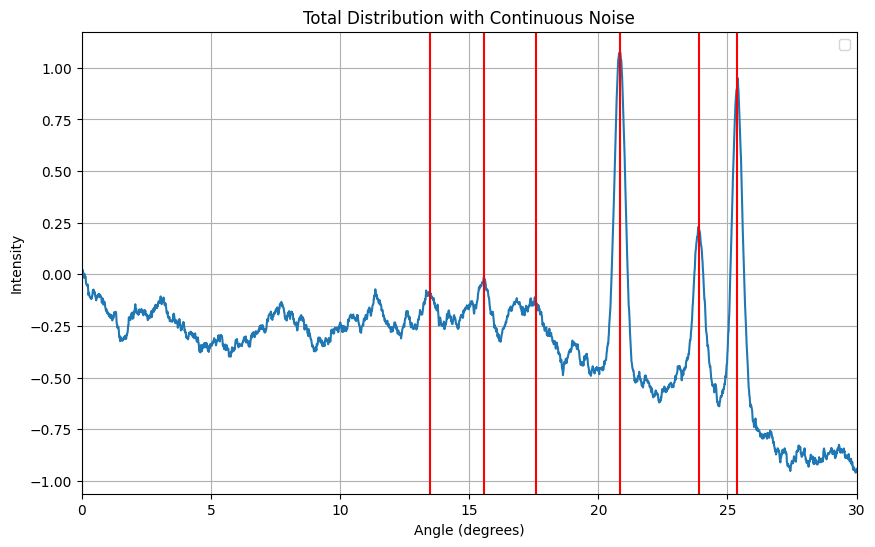

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

# 주어진 데이터
data_points = [(13.47, 0.107), (15.58, 0.106), (17.58, 0.067),(20.83,1.073),
 (23.89,0.503),(25.37,1.029)]

# 데이터 포인트에서 가우시안 함수를 사용한 분포 생성
def gaussian_distribution(x, x_peak, intensity, std_dev):
    return intensity * np.exp(-((x - x_peak)**2) / (2 * std_dev**2))

# 0부터 30까지 2500개로 나눈 데이터 포인트 생성
x_values = np.linspace(0, 30, 2500)

# 전체 분포 초기화
total_distribution = np.zeros_like(x_values)

# 각 데이터 포인트에서의 분포를 더함
for x_peak, intensity in data_points:
    # 표준편차를 작게 설정하여 peak를 명확하게 구분
    std_dev = 0.2 if x_peak in [13.47,15.58,17.58,20.83,23.89,25.37] else 0.2  # 예시로 표준편차를 설정, 조절 가능
    total_distribution += gaussian_distribution(x_values, x_peak, intensity, std_dev)

# 최대 intensity 값 계산
max_intensity = np.max(total_distribution)

# 무작위 연속적인 노이즈 추가 (부드러운 변화를 갖도록 조절)
#np.random.seed(41)  # 노이즈를 일정하게 유지하기 위해 시드 설정

# 노이즈 생성 (고정된 크기)
noise_intensity = 0.007  # 노이즈 크기
noise = noise_intensity * np.cumsum(np.random.randn(len(x_values)))
a1 = 0.39470689
mu1 = 10.72
sig1 = 0.17292617
a2 = 0.47682139
mu2 = 12.10240315
sig2 = 0.36182647
peak1 = a1 * np.exp(-((x_values - mu1)**2) / (2 * sig1**2)) * np.random.rand()
peak2 = a2 * np.exp(-((x_values - mu2)**2) / (2 * sig2**2)) * np.random.rand()

noise_func = peak1 + peak2


# 노이즈를 데이터에 추가하되, 최대 intensity 값을 유지하도록 조절
total_distribution_with_noise = total_distribution + noise
total_distribution_with_noise = max_intensity * (total_distribution_with_noise / np.max(total_distribution_with_noise))

# 보정을 통해 음수 값을 0으로 만듦
#total_distribution_with_noise = np.maximum(0, total_distribution_with_noise)

# 그림 그리기
plt.figure(figsize=(10, 6))
#plt.plot(x_values, total_distribution_with_noise, label='Total Distribution with Continuous Noise')
#plt.plot(x_values, np.cumsum(np.random.randn(len(x_values))))
plt.plot(x_values, total_distribution_with_noise)

# 그래프 및 축 제목 설정
plt.title('Total Distribution with Continuous Noise')
plt.xlabel('Angle (degrees)')
plt.ylabel('Intensity')

plt.axvline(13.47, color = 'r')
plt.axvline(15.58, color = 'r')
plt.axvline(17.58, color = 'r')
plt.axvline(20.83, color = 'r')
plt.axvline(23.89, color = 'r')
plt.axvline(25.37, color = 'r')
# x축과 y축 범위 설정
plt.xlim(0, 30)

# 그리드 표시
plt.grid(True)

# 범례 추가
plt.legend()

# 그림 보여주기
plt.show()


({1.4885954381752702: -0.3235004974114471, 2.5570228091236498: -0.22164661706189276, 4.597839135654262: -0.3776774239742401, 5.762304921968788: -0.3986041723374929, 8.343337334933974: -0.2717095279065271, 9.039615846338537: -0.37309499309651245, 10.816326530612246: -0.2830988577127741, 12.364945978391358: -0.31011773550498756, 12.953181272509005: -0.2671694223091313, 14.04561824729892: -0.2654995618085438, 16.218487394957982: -0.32628464441632027, 17.142857142857142: -0.19869681041142642, 18.631452581032413: -0.48785762622833573, 19.71188475390156: -0.4913687344931146, 22.35294117647059: -0.6204260585456483, 24.68187274909964: -0.6391100457443475, 27.430972388955585: -0.9521199143601928, 28.139255702280913: -0.9314016941576918, 29.963985594237695: -0.9603910542463396}, {0.04801920768307323: 0.02024225162525315, 2.076830732292917: -0.14475624208178156, 3.0612244897959187: -0.1069070019462063, 5.39015606242497: -0.2933391172342606, 7.73109243697479: -0.13335875852961512, 8.52340936374549

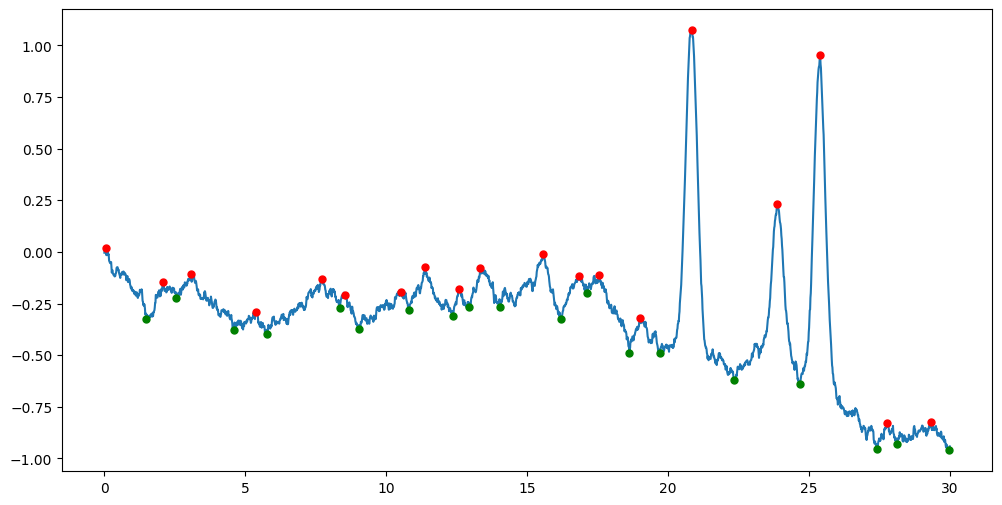

In [ ]:
# He  (adaptive constant)

import pandas as pd
from google.colab import files
import io
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from dataclasses import dataclass
from scipy.optimize import curve_fit

y=total_distribution_with_noise.tolist()
x=x_values.tolist()

@dataclass
class Extremum:
  number:int = None
  angle:float = None
  intensity:float = None

maxi=Extremum(0,x[0],y[0])    # Preparation
mini=Extremum(0,x[0],y[0])
noiseT=Extremum(0,x[0],y[0])
noiseB=Extremum(0,x[0],y[0])
width = x[-1]-x[0]
peaks=({},{})
points=({},{})
globalmax = y[0]
globalmin = y[0]
state='N'
stateminus=0
stateratio=0
stack=0
dyList=[]

sigma = 0.01      # initial constant

lr=0.01           # gradient learing constants
eqoch=50

section=10         # peak selection constants
peakRate=5

for i,v in enumerate(y):   # to find global max/min
  if v > globalmax:
    globalmax=v
  elif v < globalmin:
    globalmin=v
height = globalmax-globalmin
ratio = height/width
smallNum=0.0000000001*height

const3=5          # gradient learing constants
const4=ratio*5

for i in range(len(y)):    # i is a cursor
  k=x[i]
  n=y[i]

  # gradient(dy) and sigma
  if i < len(y)-section and (x[i+section]-x[i]) != 0:
    dy=(y[i+section]-y[i])/(x[i+section]-x[i])
    b=y[i]-dy*x[i]
    for _ in range(eqoch):
        q = map(lambda p: dy*p+b,x[i:i+section])
        loss = sum(map(lambda q,y:(q-y)**2,q,y[i:i+section]))
        diffLoss = sum(map(lambda q,y,x:(q-y)*x,q,y[i:i+section],x[i:i+section]))
        diffLossB = sum(map(lambda q,y:(q-y),q,y[i:i+section]))
        if abs(diffLoss)<smallNum:
            pass
        else:
            dy -= lr*loss/diffLoss
        if abs(diffLossB)<smallNum:
            pass
        else:
            b -= lr*loss/diffLossB
    sigma = 2*np.sqrt(loss/(section+1))
  dyList.append((dy,sigma))
  if len(dyList) > section+2:
    dyList.pop(0)



  if i > section and i<len(y)-section:
    prevDy = dyList[-section-1][0]
    if dy-prevDy > const4:
      if prevDy*dy <= 0:
        stateminus+=1
        points[0][k]=n
      elif abs(dy/prevDy) > const3 or abs(prevDy/dy) > const3:
        stateratio+=1
        points[0][k]=n
    elif prevDy-dy > const4:
      if prevDy*dy <= 0:
        stateminus+=1
        points[1][k]=n
      elif abs(dy/prevDy) > const3 or abs(prevDy/dy) > const3:
        stateratio+=1
        points[1][k]=n


  # setting coefficient of selecting peaks
  if i > section:
    const2 = dyList[-section-1][1]*peakRate
  else:
    const2 = height/10
  const1 = const2/ratio/100

  # # test code for finding
  # if abs(k -17)<0.1:
  #   print("!!!!!!!!!!!!!!!!!!!!!!!  stack:{} k:{},dy: {}, Loss: {}, Sigma: {}, const1:{}, const2:{}, minkey:{},maxkey:{}".format(stack,k,dy,loss,dyList[-section-1][1],const1,const2,mini.angle,maxi.angle))
  #   print("!!!!!!!!!!!!!!!!!!!!!!!",maxi.angle > mini.angle, stack>2, k-maxi.angle>const1 , maxi.intensity-mini.intensity>const2 , maxi.intensity-n>const2,maxi.intensity-n,const2)
  #   print("!!!!!!!!!!!!!!!!!!!!!!!",maxi.angle < mini.angle,stack>2, k-mini.angle>const1,  maxi.intensity-mini.intensity>const2,  n-mini.intensity>const2,n-mini.intensity,const2)

  # the algorithm
  if n > maxi.intensity:
    maxi.intensity = n
    maxi.angle = k
    stack=0
  elif n < mini.intensity:
    mini.intensity=n
    mini.angle = k
    stack=0
  else:
    stack+=1
    if maxi.angle > mini.angle:
      if stack>3 and k-maxi.angle>const1 and maxi.intensity-mini.intensity>const2 and maxi.intensity-n>const2:
        # print("k: {}, n: {}, maxi.intensity: {}, maxi.angle: {}, mini.intensity: {}, mini.angle: {}, sig: {}, con1:{}, con2:{}".format(k,n,maxi.intensity,maxi.angle,mini.intensity,mini.angle,sigma,const1,const2))
        peaks[0][mini.angle] = mini.intensity
        peaks[1][maxi.angle] = maxi.intensity
        mini.intensity = maxi.intensity
        mini.angle = maxi.angle
        state='H'
        history=0
    elif maxi.angle < mini.angle:
      if stack>3 and k-mini.angle>const1 and maxi.intensity-mini.intensity>const2 and n-mini.intensity>const2:
        # print("k: {}, n: {}, maxi.intensity: {}, maxi.angle: {}, mini.intensity: {}, mini.angle: {}, sig: {}, con1:{}, con2:{}".format(k,n,maxi.intensity,maxi.angle,mini.intensity,mini.angle,sigma,const1,const2))
        peaks[0][mini.angle] = mini.intensity
        peaks[1][maxi.angle] = maxi.intensity
        maxi.intensity = mini.intensity
        maxi.angle=mini.angle
        state='L'
        history=0
    else:
      pass
peaks[1][maxi.angle]=maxi.intensity
peaks[0][mini.angle]=mini.intensity

print(peaks)
print(points)
print(stateminus,stateratio)

plt.figure(figsize=(12, 6))
plt.plot(x,y)
plt.plot(peaks[0].keys(),peaks[0].values(), 'go',markersize=5)
plt.plot(peaks[1].keys(),peaks[1].values(), 'ro',markersize=5)
# plt.plot(points[0].keys(),points[0].values(), 'bo',markersize=3)
# plt.plot(points[1].keys(),points[1].values(), 'yo',markersize=3)


19 29.975990396158466 / 19 29.987995198079233 / 19 30.0 / 

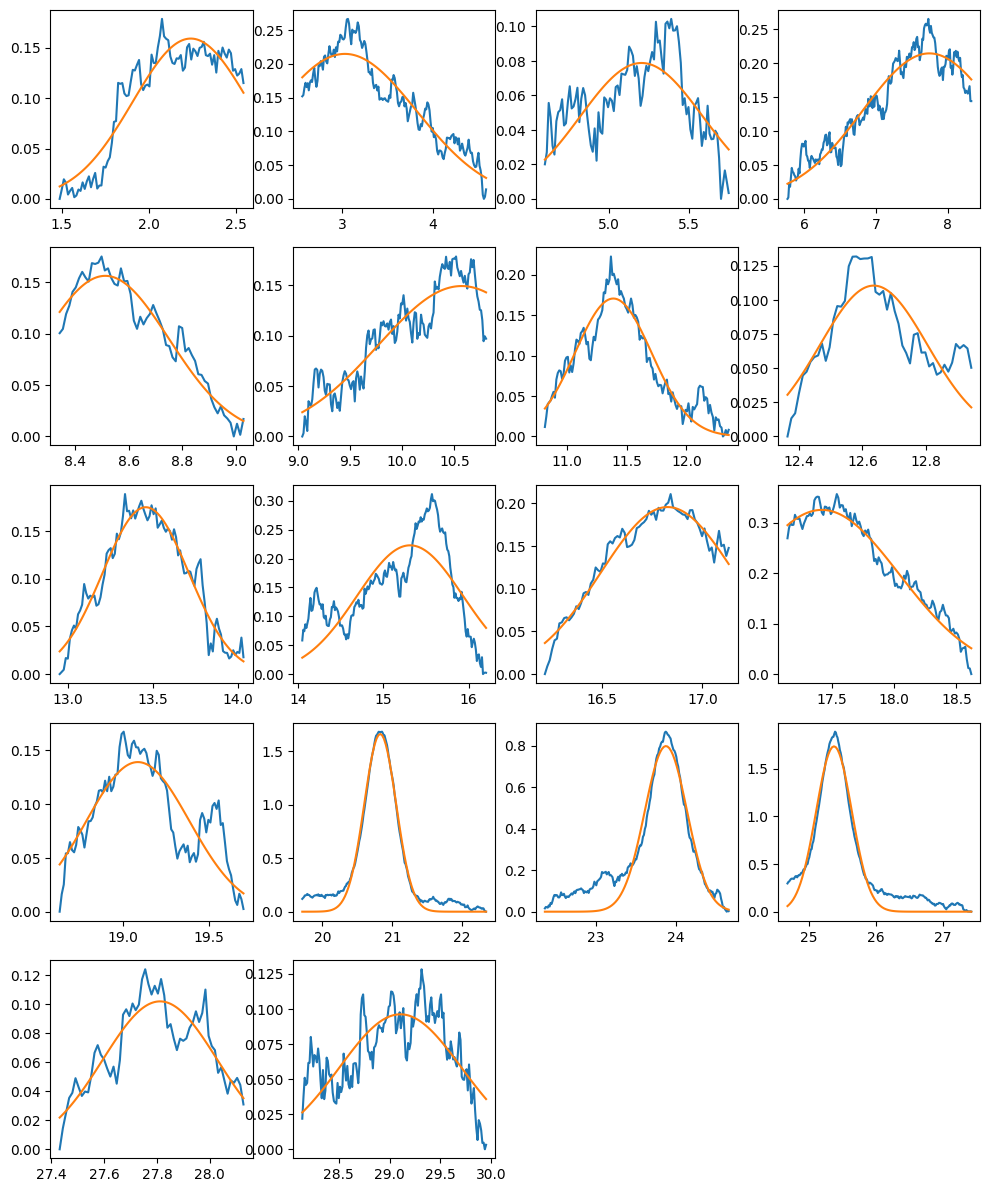

guassA              guassB              noise               Height Ratio        
0.159198152280      0.333384738714      1.942419472774      0.087906129950      
0.214786779943      0.792317202672      2.602875911372      0.131144115696      
0.078811193821      0.384372440359      3.574404425484      0.051334613127      
0.214402875324      0.932168756061      3.316206774200      0.130447257015      
0.156214786370      0.237813226722      1.370073987108      0.080411943377      
0.149364525127      0.800839842597      3.669390068545      0.087896303476      
0.170587522311      0.320147745114      1.475308259798      0.109463344003      
0.110509008951      0.168590214934      0.789137578799      0.064838291553      
0.175119312773      0.253212759384      1.275233019138      0.092894302465      
0.223004433134      0.624185815271      1.668829588679      0.153325459608      
0.195727758655      0.332049637063      0.952304098952      0.103734424345      
0.325069122643      0.624029

In [ ]:
extremums = [list(peaks[1].keys()),list(peaks[0].keys())]
peak_manual=[13.47,15.58,17.58,20.83,23.89,25.37]
smallNum:float=0.0000000001*height

class Subset():
  def __init__(self,peak=None,noise=None,height=None,globHeight= None,globWidth= None):
    self.x_data:list = []
    self.y_data:list = []
    self.peak:tuple = peak
    self.noise:float = noise
    self.height:float = height
    self.globHeight:float = globHeight
    self.globWidth:float = globWidth
    self.yesorno:str=None
    self.amplitude:float = None
    self.sigma:float = None

b=0
seperated=[]
sub=Subset(globHeight=height,globWidth=width)
state='N'
switch='N'

for i in range(len(x)):
  if b < len(extremums[1]):
    if x[i]==extremums[1][b]:
      state = 'node'
      if switch == 'off':
        state = 'sibal'
        sub = Subset(globHeight=height,globWidth=width)
      else:
        switch = 'off'
        if len(sub.x_data)!=0:
          seperated.append(sub)
          sub = Subset(globHeight=height,globWidth=width)
      b+=1
    elif x[i] in extremums[0] and state == 'node':
      switch = 'on'
      sub.peak=(x[i],y[i])
    if state == 'node':
      sub.x_data.append(x[i])
      sub.y_data.append(y[i])
  else:
    print(b,x[i],end=' / ')



# plt.figure(figsize=(12,18))
# for i in range(len(seperated)):
#   plt.subplot(6,4,i+1)
#   plt.plot(seperated[i].x_data,seperated[i].y_data)

# plt.show()
###########################
for sub in seperated:
  dis=2*sub.peak[1]-sub.y_data[0]-sub.y_data[-1]
  temp=sub.y_data[0]
  sum=0
  ggminimum=sub.y_data[0]
  for v in sub.y_data:
    if ggminimum>v:
      ggminimum=v
    sum+=abs(v-temp)
    temp=v
  noise = (sum-dis)/dis
  if noise < smallNum:
    noise=0
  peak_manual_copy=list(peak_manual)
  if len(peak_manual_copy)!=0:
    for manual in peak_manual_copy:
      if manual>sub.x_data[0] and manual<sub.x_data[-1]:
        sub.yesorno='yes'
        del peak_manual_copy[peak_manual_copy.index(manual)]
        break
      elif abs(manual-sub.peak[0])<smallNum:
        sub.yesorno='yes'
      else:
        sub.yesorno='no'
  sub.noise = noise
  sub.height = sub.peak[1]-ggminimum
########


def gaussian(x, A, mu, sigma):
    f = A * np.exp(-(x - mu)**2 / (2 * sigma**2))
    return f

plt.figure(figsize=(12, 18))
poptSet=[]
for i, subset in enumerate(seperated):
    y_data=[]
    minimum=(subset.peak[1]-subset.height)
    for sy in subset.y_data:
        y_data.append(sy-minimum)
    plt.subplot(6, 4, i + 1)
    plt.plot(subset.x_data, y_data)

    # 초기 추정값 설정
    initial_guess = [subset.peak[1], (subset.x_data[0]+subset.x_data[-1])/2, 0.4]

    try:
        # curve_fit 함수 적용 (maxfev를 더 큰 값으로 설정)
        popt, pcov = curve_fit(gaussian, subset.x_data, y_data, p0=initial_guess, maxfev=100000)
        subset.amplitude=popt[0]
        subset.sigma=popt[2]
        # 가우스 함수 피팅 결과 그리기
        x_fit = np.linspace(subset.x_data[0],subset.x_data[-1], 100)
        y_fit = gaussian(x_fit, *popt)
        plt.plot(x_fit, y_fit)
    except RuntimeError:
        print(f"Failed to fit Gaussian for subplot {i + 1}")

plt.show()

x_sample=[]
y_sample=[]
for sub in seperated:
  # guassHalfwidth = sub.height/2+min(sub.y_data[0],sub.y_data[-1])
  x_sample.append((sub.amplitude,abs(sub.sigma),sub.noise,sub.height/sub.globHeight))
  y_sample.append(sub.yesorno)


x_train=[]
y_train=[]
x_train= x_train + x_sample
y_train= y_train + y_sample

strFormat = '%-20.12f%-20.12f%-20.12f%-20.12f\n'
strOut = '%-20s%-20s%-20s%-20s\n' % ('guassA','guassB','noise','Height Ratio')
for i in x_train:
  strOut += strFormat %(*i,)
print(strOut)

In [ ]:
from scipy.optimize import curve_fit

class Subset():
  def __init__(self,peak=None,noise=None,height=None,globHeight= None,globWidth= None):
    self.x_data:list = []
    self.y_data:list = []
    self.peak:tuple = peak
    self.noise:float = noise
    self.height:float = height
    self.globHeight:float = globHeight
    self.globWidth:float = globWidth
    self.yesorno:str=None
    self.amplitude:float = None
    self.sigma:float = None

In [ ]:
# He  (adaptive constant)

import pandas as pd
from google.colab import files
import io
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from dataclasses import dataclass


# 파일 경로를 직접 입력
file_path = "/content/Hedata.xlsx"  # 파일 경로를 실제 파일 경로로 변경해야 합니다.

# 엑셀 파일을 Pandas 데이터프레임으로 읽어오기
df = pd.read_excel(file_path)

# B3부터 B1817까지의 데이터를 'angle' 변수에 저장
angle = df.iloc[145:1985, 1]

# D3부터 D1817까지의 데이터를 'Intensity' 변수에 저장
intensity = df.iloc[145:1985, 3]
y=list(intensity.values)
x=list(angle.values)

@dataclass
class Extremum:
  number:int = None
  angle:float = None
  intensity:float = None

maxi=Extremum(0,x[0],y[0])    # Preparation
mini=Extremum(0,x[0],y[0])
noiseT=Extremum(0,x[0],y[0])
noiseB=Extremum(0,x[0],y[0])
width = x[-1]-x[0]
peaks=({},{})
points=({},{})
points2=({},{})
points3=({},{})
globalmax = y[0]
globalmin = y[0]
state='N'
stateminus=0
stateratio=0
stack=0
dyList=[]

sigma = 0.01      # initial constant
sigma2 = 0.01

lr=0.01           # gradient learing constants
eqoch=50

section:int=3         # peak selection constants
section2:int=4
section3:int=5
peakRate=8

for i,v in enumerate(y):   # to find global max/min
  if v > globalmax:
    globalmax=v
  elif v < globalmin:
    globalmin=v
height = globalmax-globalmin
ratio = height/width

          # gradient learing constants
const3=8
const4=ratio*4

for i in range(len(y)):    # i is a cursor
  k=x[i]
  n=y[i]

  # gradient(dy) and sigma
  if i < len(y)-section and (x[i+section]-x[i]) != 0:
    dy=(y[i+section]-y[i])/(x[i+section]-x[i])
    b=y[i]-dy*x[i]
    for _ in range(eqoch):
      q = map(lambda p: dy*p+b,x[i:i+section])
      loss = sum(map(lambda q,y:(q-y)**2,q,y[i:i+section]))
      diffLoss = sum(map(lambda q,y,x:(q-y)*x,q,y[i:i+section],x[i:i+section]))
      dy = dy - lr*diffLoss
    sigma = 2*np.sqrt(loss/(section+1))
  dyList.append((dy,sigma))
  if len(dyList) > section+2:
    dyList.pop(0)

  if i > section2 and (x[i]-x[i-section2]) != 0:
    dy2=(y[i]-y[i-section2])/(x[i]-x[i-section2])
    b=y[i]-dy2*x[i]
    for _ in range(eqoch):
      q = map(lambda p: dy2*p+b,x[i-section2:i])
      loss2 = sum(map(lambda q,y:(q-y)**2,q,y[i-section2:i]))
      diffLoss2 = sum(map(lambda q,y,x:(q-y)*x,q,y[i-section2:i],x[i-section2:i]))
      dy2 = dy2 - lr*diffLoss2
    sigma2 = 2*np.sqrt(loss2/(section2+1))


  if i > section and i<len(y)-section:
    prevDy = dyList[-section-1][0]
    if dy-prevDy > const4:
      if prevDy*dy <= 0:
        stateminus+=1
        points[0][k]=n
      elif abs(dy/prevDy) > const3 or abs(prevDy/dy) > const3:
        stateratio+=1
        points[0][k]=n
    elif prevDy-dy > const4:
      if prevDy*dy <= 0:
        stateminus+=1
        points[1][k]=n
      elif abs(dy/prevDy) > const3 or abs(prevDy/dy) > const3:
        stateratio+=1
        points[1][k]=n

###################
  if i < len(y)-section3 and (x[i+section3]-x[i]) != 0:
    dy=(y[i+section3]-y[i])/(x[i+section3]-x[i])
    b=y[i]-dy*x[i]
    for _ in range(eqoch):
      q = map(lambda p: dy*p+b,x[i:i+section3])
      loss = sum(map(lambda q,y:(q-y)**2,q,y[i:i+section3]))
      diffLoss = sum(map(lambda q,y,x:(q-y)*x,q,y[i:i+section3],x[i:i+section3]))
      dy = dy - lr*diffLoss
    sigma = 2*np.sqrt(loss/(section3+1))
  dyList.append((dy,sigma))
  if len(dyList) > section3+2:
    dyList.pop(0)
###############################
  if i > section3 and i<len(y)-section3 and (x[i+1]-x[i]) !=0:
    prevDy = dyList[-section3-1][0]
    gapDy = (y[i+1]-y[i])/(x[i+1]-x[i])
    if gapDy-prevDy > const4:
      if prevDy*gapDy == 0:
        stateminus+=1
        points2[0][k]=n
      elif abs(gapDy/prevDy) > const3 or abs(prevDy/gapDy) > const3:
        stateratio+=1
        points2[0][k]=n


  if i > 1 and i<len(y)-section3 and (x[i]-x[i-1])!=0:
    prevDy = (y[i]-y[i-1])/(x[i]-x[i-1])
    if dy-prevDy > const4:
      if prevDy*dy == 0:
        stateminus+=1
        points2[0][k]=n
      elif abs(dy/prevDy) > const3 or abs(prevDy/dy) > const3:
        stateratio+=1
        points2[0][k]=n

  # setting coefficient of selecting peaks
  const2 = sigma2*peakRate
  const1 = const2/ratio/100

  # test code for finding
  # if abs(k - 14.1)<0.1:
  #   print("!!!!!!!!!!!!!!!!!!!!!!!  stack:{} k:{},dy: {}, Loss: {}, Sigma: {}, const1:{}, const2:{}, minkey:{},maxkey:{}".format(stack,k,dy,loss,sigma2,const1,const2,mini.angle,maxi.angle))
  #   print("!!!!!!!!!!!!!!!!!!!!!!!",maxi.angle > mini.angle, stack>2, k-maxi.angle>const1 , maxi.intensity-mini.intensity>const2 , maxi.intensity-n>const2,maxi.intensity-n,const2)
  #   print("!!!!!!!!!!!!!!!!!!!!!!!",maxi.angle < mini.angle,stack>2, k-mini.angle>const1,  maxi.intensity-mini.intensity>const2,  n-mini.intensity>const2,n-mini.intensity,const2)

  # the algorithm
  if n > maxi.intensity:
    maxi.intensity = n
    maxi.angle = k
    stack=0
  elif n < mini.intensity:
    mini.intensity=n
    mini.angle = k
    stack=0
  else:
    stack+=1
    if maxi.angle > mini.angle:
      if stack>2 and k-maxi.angle>const1 and maxi.intensity-mini.intensity>const2 and maxi.intensity-n>const2:
        # print("k: {}, n: {}, maxi.intensity: {}, maxi.angle: {}, mini.intensity: {}, mini.angle: {}, sig: {}, con1:{}, con2:{}".format(k,n,maxi.intensity,maxi.angle,mini.intensity,mini.angle,sigma,const1,const2))
        peaks[0][mini.angle]=mini.intensity
        peaks[1][maxi.angle]=maxi.intensity
        mini.intensity = maxi.intensity
        mini.angle = maxi.angle
        state='H'
        history=0
    elif maxi.angle < mini.angle:
      if stack>2 and k-mini.angle>const1 and maxi.intensity-mini.intensity>const2 and n-mini.intensity>const2:
        # print("k: {}, n: {}, maxi.intensity: {}, maxi.angle: {}, mini.intensity: {}, mini.angle: {}, sig: {}, con1:{}, con2:{}".format(k,n,maxi.intensity,maxi.angle,mini.intensity,mini.angle,sigma,const1,const2))
        peaks[0][mini.angle] = mini.intensity
        peaks[1][maxi.angle]=maxi.intensity
        maxi.intensity = mini.intensity
        maxi.angle=mini.angle
        state='L'
        history=0
    else:
      pass
peaks[1][maxi.angle]=maxi.intensity
peaks[0][mini.angle]=mini.intensity

print(peaks)
print(points3)
print(stateminus,stateratio)

# plt.figure(figsize=(12, 6))
# plt.plot(angle,intensity)
# plt.plot(peaks[0].keys(),peaks[0].values(), 'go',markersize=5)
# plt.plot(peaks[1].keys(),peaks[1].values(), 'ro',markersize=5)
# plt.plot(points2[0].keys(),points2[0].values(), 'bo',markersize=3)
# plt.plot(points[1].keys(),points[1].values(), 'yo',markersize=3)



({2.046: 0.17579, 9.15: 0.0586, 11.1: 0.31861, 15.408: 0.03418, 17.633: -0.00366, 18.558: 0.00977, 21.729: 0.06226, 24.217: 0.1062, 25.8: 0.12207, 25.912: 0.12085, 26.483: 0.12452, 30.121: -0.0354}, {1.567: 0.23194, 4.117: 0.21485, 10.721: 0.3943, 12.1: 0.47853, 16.233: 0.1062, 18.104: 0.06714, 21.204: 1.07303, 23.917: 0.50295, 25.4: 1.02908, 26.208: 0.22584, 27.083: 0.14283})
({}, {})
242 128


In [ ]:
bottoms=[[],{},{}]

peaksCopy = list(peaks[1].keys())
peaksCopy.pop(0)
maxPo=list(points2[0].keys())[0]
count=0
for po in points2[0].keys():
  pe = peaksCopy[count]
  if np.sqrt((ratio**2)*((pe-po)**2)+(peaks[1][pe]-points2[0][po])**2) > const2/2:
    if po<pe:
      if maxPo<po:
        maxPo=po
    elif pe<po :
      if maxPo==po:
        break
      bottoms[0].append((pe,y[x.index(pe)]))
      bottoms[1][maxPo] = points2[0][maxPo]
      bottoms[2][po] = points2[0][po]
      if count == len(peaksCopy)-1:
        break
      else:
        count+=1


# plt.figure(figsize=(12, 6))
# plt.plot(x,y)
# plt.plot(bottoms[1].keys(),bottoms[1].values(), 'bo',markersize=3)
# plt.plot(bottoms[2].keys(),bottoms[2].values(), 'ro',markersize=3)



b=0
seperated=[]
state='N'

for i in range(len(y)):
  if b < len(bottoms[1].keys()):
    if x[i]==list(bottoms[1].keys())[b]:
      state = 'on'
      sub=Subset(globHeight=height,globWidth=width)
    elif x[i] in list(peaksCopy) and state == 'on':
      sub.peak=(x[i],y[i])
    elif x[i]== list(bottoms[2].keys())[b] and state == 'on':
      state = 'ready'
    elif state == 'ready':
      state = 'off'
      seperated.append(sub)
      sub=Subset(globHeight=height,globWidth=width)
      b+=1
    if state == 'on' or state == 'ready':
      sub.x_data.append(x[i])
      sub.y_data.append(y[i])


# plt.figure(figsize=(12,18))
# for i in range(len(seperated)):
#   plt.subplot(6,4,i+1)
#   plt.plot(seperated[i].x_data,seperated[i].y_data)

# plt.show()

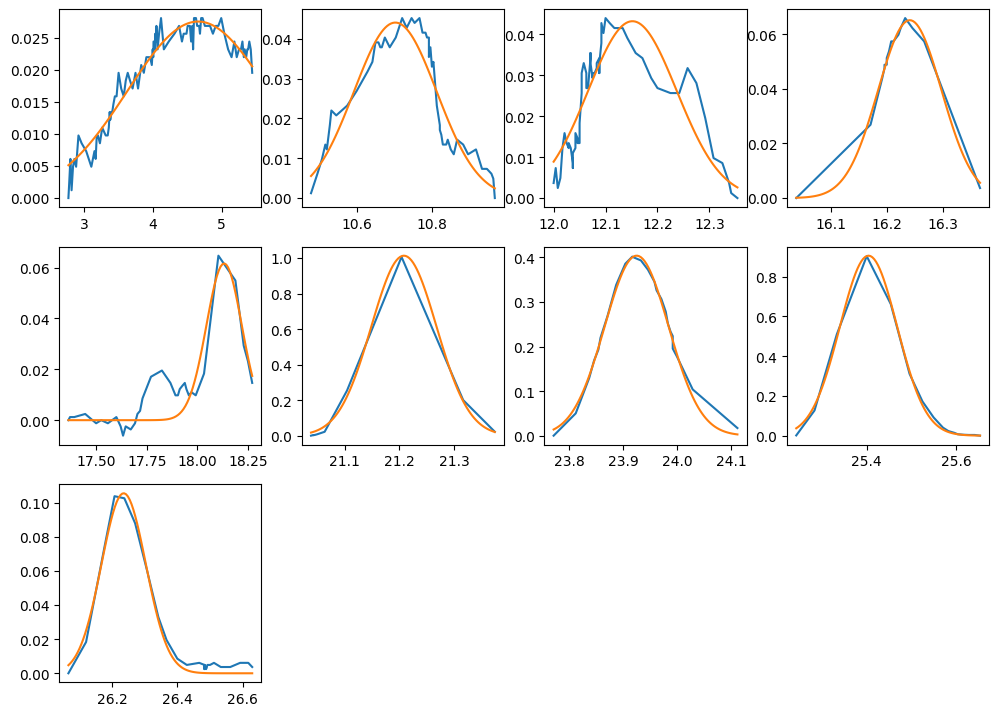

In [ ]:
for sub in seperated:
  dis=2*sub.peak[1]-sub.y_data[0]-sub.y_data[-1]
  temp=sub.y_data[0]
  sum=0
  for v in sub.y_data:
    sum+=abs(v-temp)
    temp=v
  noise = (sum-dis)/dis
  if noise < 0.0000000001*sub.globHeight:
    noise=0
  sub.noise = noise
  sub.height = (sub.peak[1]-min(sub.y_data[0],sub.y_data[-1]))


def gaussian(x, A, mu, sigma):
    f = A * np.exp(-(x - mu)**2 / (2 * sigma**2))
    return f

plt.figure(figsize=(12, 18))
poptSet=[]
for i, subset in enumerate(seperated):
    y_data=[]
    minimum=(subset.peak[1]-subset.height)
    for sy in subset.y_data:
        y_data.append(sy-minimum)
    plt.subplot(6, 4, i + 1)
    plt.plot(subset.x_data, y_data)

    # 초기 추정값 설정
    initial_guess = [subset.peak[1], (subset.x_data[0]+subset.x_data[-1])/2, 0.4]

    try:
        # curve_fit 함수 적용 (maxfev를 더 큰 값으로 설정)
        popt, pcov = curve_fit(gaussian, subset.x_data, y_data, p0=initial_guess, maxfev=100000)
        subset.amplitude=popt[0]
        subset.sigma=popt[2]
        # 가우스 함수 피팅 결과 그리기
        x_fit = np.linspace(subset.x_data[0],subset.x_data[-1], 100)
        y_fit = gaussian(x_fit, *popt)
        plt.plot(x_fit, y_fit)
    except RuntimeError:
        print(f"Failed to fit Gaussian for subplot {i + 1}")

x_sample=[]
y_sample=[]

for sub in seperated:
  x_sample.append((sub.amplitude,sub.sigma,sub.noise,sub.height/sub.globHeight))

x_test = x_sample

In [ ]:
x_test=[(0.0275400058904709,
  1.027463680019179,
  3.333697433096665,
  0.025333128839890674),
 (0.044043987306034704,
  -0.10990912645854738,
  0.4387342908438065,
  0.04075133296644803),
 (0.04318617149330069,
  -0.08534763608048905,
  0.9851596818235799,
  0.03965067708380321),
 (0.06515148850453387, 0.0567290509239647, 0, 0.059471504740939894),
 (0.06163278117328262,
  0.08725564951467156,
  0.5103267973856208,
  0.05837084885829507),
 (1.013147285561767,
  0.05976665720976183,
  0.001226247732195647,
  0.9074907752406557),
 (0.4038486364107396, 0.059330150881161774, 0, 0.3623413296283933),
 (0.9057012132275358, 0.06413262270286474, 0, 0.8149725287117815),
 (0.10549990845439149,
  -0.06782301451662937,
  0.0957472899396672,
  0.093618902411519)]

In [ ]:
y_test=['no','no','no','yes','yes','yes','yes','yes','yes']

[[3 0]
 [3 3]]
              precision    recall  f1-score   support

          no       0.50      1.00      0.67         3
         yes       1.00      0.50      0.67         6

    accuracy                           0.67         9
   macro avg       0.75      0.75      0.67         9
weighted avg       0.83      0.67      0.67         9



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

['no' 'no' 'no' 'no' 'no' 'yes' 'yes' 'yes' 'no']


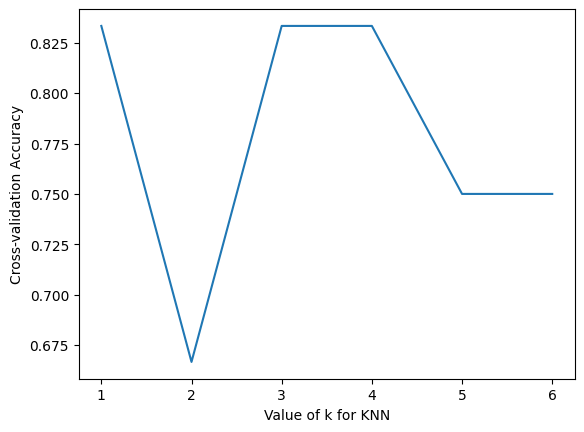

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

scaler = StandardScaler()

x_train = np.array(x_train,dtype=np.float64)
scaler.fit(x_train)

# scaler=np.zeros(len(x_train[0]))
# for i in range(len(x_train[0])):
#   size = abs(np.max(x_train[i])-np.min(x_train[i]))
#   scaler[i]=size

# def transform(x_set):
#   result= np.zeros(np.shape(x_set))
#   for i in range(len(x_set[0])):
#     for x0 in x_set[i]:
#       result[i].append(x0/scaler[i])
#   result= np.array(result,dtype=np.float64)
#   return result

# 진폭, 시그마, 노이즈, 전체에 대한 서브셋 높이 비율, half width

# training_points = transform(x_train)

training_labels = y_train

# unknown_points = transform(np.array(x_test,dtype=np.float64))

training_points = scaler.transform(x_train)

unknown_points = scaler.transform(x_test)


classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(training_points, training_labels)

guesses = classifier.predict(unknown_points)

print(confusion_matrix(y_test,guesses))
print(classification_report(y_test,guesses))

# fig = plt.figure(figsize=(9,6))
# ax = fig.add_subplot(111,projection='3d')


# x_train = training_points[:,0]
# y_train = training_points[:,1]
# z_train = training_points[:,2]
"""
x_test = unknown_points[0]
y_test = unknown_points[1]
z_test = unknown_points[2]
"""
# print(training_labels)
"""
for i in range(len(training_labels)):
    if training_labels == 'yes':
        ax.scatter(x_train,y_train,z_train, label = 'yes', color = 'r')
    else:
        ax.scatter(x_train,y_train,z_train, label = 'no', color = 'b')
"""
# ax.scatter(x_test,y_test,z_test, label = 'teset')
# plt.legend()
k_scores=[]
for k in range(1,7):
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(training_points, training_labels)
  scores = cross_val_score(classifier,x_test,y_test,cv=6,scoring='accuracy')
  k_scores.append(scores.mean())

plt.plot(range(1,7),k_scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Cross-validation Accuracy')
print(guesses)


              precision    recall  f1-score   support

          no       0.50      1.00      0.67         3
         yes       1.00      0.50      0.67         6

    accuracy                           0.67         9
   macro avg       0.75      0.75      0.67         9
weighted avg       0.83      0.67      0.67         9



In [ ]:
# 참고용
from scipy.optimize import curve_fit

def gaussian(x, A, mu, sigma):
    f = A * np.exp(-(x - mu)**2 / (2 * sigma**2))
    return f

plt.figure(figsize=(12, 18))

for i in range(len(seperated)):
    plt.subplot(6, 4, i + 1)
    plt.plot(seperated[i].keys(), seperated[i].values())

    # 초기 추정값 설정
    initial_guess = [max(seperated[i].values()), np.median(list(seperated[i].keys())), 0.4]

    try:
        # curve_fit 함수 적용 (maxfev를 더 큰 값으로 설정)
        popt, pcov = curve_fit(gaussian, list(seperated[i].keys()), list(seperated[i].values()), p0=initial_guess, maxfev=100000)
        print(popt)
        # 가우스 함수 피팅 결과 그리기
        x_fit = np.linspace(min(seperated[i].keys()), max(seperated[i].keys()), 100)
        y_fit = gaussian(x_fit, *popt)
        plt.plot(x_fit, y_fit)
    except RuntimeError:
        print(f"Failed to fit Gaussian for subplot {i + 1}")

plt.show()


In [ ]:
from scipy.optimize import curve_fit

def gaussian(x, A, mu, sigma):
    f = A * np.exp(-(x - mu)**2 / (2 * sigma**2))
    return f

plt.figure(figsize=(12, 18))
poptSet=[]

for i, subset in enumerate(seperated):
    y_data=subset.y_data-subset.peak[1]-subset.height
    plt.subplot(6, 4, i + 1)
    plt.plot(subset.x_data, y_data)

    # 초기 추정값 설정
    initial_guess = [subset.peak[1], (subset.x_data[0]+subset.x_data[-1])/2, 0.4]

    try:
        # curve_fit 함수 적용 (maxfev를 더 큰 값으로 설정)
        popt, pcov = curve_fit(gaussian, subset.x_data, y_data, p0=initial_guess, maxfev=100000)
        print(popt)
        poptSet.append(popt)
        # 가우스 함수 피팅 결과 그리기
        x_fit = np.linspace(subset.x_data[0],subset.x_data[-1], 100)
        y_fit = gaussian(x_fit, *popt)
        plt.plot(x_fit, y_fit)
    except RuntimeError:
        print(f"Failed to fit Gaussian for subplot {i + 1}")

plt.show()
